# 数据预处理(preprocessing)

## 打乱顺序

In [1]:
# 生成数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target
print(y)
y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


(150,)

In [0]:
# 索引的随机排列
shuffle_index = np.random.permutation(150) 
y = y[shuffle_index]
y

array([2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0,
       0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2])

## 数据分离

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423003629.png)

In [2]:
from sklearn.model_selection import train_test_split

#分离数据
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## 归一化/标准化(Normalization)

### 原理

- 好处:
    - 避免因为量纲问题导致被一个数据主导
    - 都是一种线性变换，都是对向量X按照比例压缩再进行平移
    - 加快收束
    
- 区别:
    - 归一化(Normalization)是将样本的特征值转换到同一量纲下把数据映射到[0,1]或者[-1, 1]区间内，仅由变量的极值决定，因区间放缩法是归一化的一种。
    - 标准化(Standardization)是依照特征矩阵的列处理数据，其通过求z-score的方法，转换为标准正态分布，和整体样本分布相关，每个样本点都能对标准化产生影响。  

- 常用方法  
    - 最值归一化:  
    $$x_{\text {scale}}=\frac{x-x_{\text {mean}}}{s}$$
    - 均值方差归一化  
    $$x_{\text {scale}}=\frac{x-x_{\text {mean}}}{s}$$
  
- 步骤:
    1. 先对训练数据进行归一化/标准化
    2. 再拿训练数据的数学特征(平均数,标准差)对测试数据进行标准化
    3. (x_test-mean_train)/std_train

- 没有进行标准化/归一化
    - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423002739.png)
- 进行了标准化/归一化
    - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423002752.png)  


### Sklearn 例子

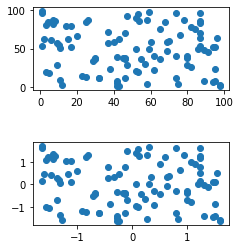

In [8]:
# 可视化
from sklearn.preprocessing import StandardScaler
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt

cps = np.random.randint(0, 100, (100, 2))
ss = StandardScaler()
std_cps = ss.fit_transform(cps)
 
gs = gridspec.GridSpec(5,5)
fig = plt.figure()
ax1 = fig.add_subplot(gs[0:2, 1:4])
ax2 = fig.add_subplot(gs[3:5, 1:4])
 
ax1.scatter(cps[:, 0], cps[:, 1])
ax2.scatter(std_cps[:, 0], std_cps[:, 1])

In [11]:
# 步骤
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 分离数据
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# 加载标准化包
# fit模型
scaler = StandardScaler()
scaler.fit(x_train)
# 传出处理好的数据
x_new_train = scaler.transform(x_train)
x_new_test = scaler.transform(x_test)

# 衡量指标(Metrics)

## 公式

1. **均方误差MSE(mean squared error)**
    - 解决由样本数量不同引起的问题,比如10个样本误差100,10000个样本误差200
$$
\frac{1}{m} \sum_{i=1}^{m}\left(y_{i e s t}^{(i)}-\hat{y}_{i e s t}^{(i)}\right)^{2}
$$

2. **均方根误差RMSE(root mean squared error)**
    - 解决量纲的问题,比如  $万^2$
$$
\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right)^{2}}=\sqrt{M S E_{t e s t}}
$$

3. **平均绝对误差MAE(mean absolote error)**
$$
\frac{1}{m} \sum_{i=1}^{m}\left|y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right|
$$

4. **R_squared**
    - 分子表示, 使用我们的模型预测产生的错误. 
    - 分母表示y-$y - \bar y$产生的错误  
$${R^2} = 1 - \frac{{S{S_{{\rm{residual}}}}}}{{S{S_{{\rm{total}}}}}}\begin{array}{*{20}{c}}
{({\rm{Residual Sum of Squares}})}\\
{({\rm{Toal Sumof Squares}})}
\end{array}$$  
    - r方小于等于1
    - 越大越好, 当等于1时, 模型不犯错误
    - 当等于0时, 模型等同于基准模型 
$${R^2} = 1 - \frac{{\sum\limits_i {{{\left( {{{\hat y}^{(i)}} - {y^{(i)}}} \right)}^2}} }}{{\sum\limits_i {{{\left( {{{\bar y}^\prime } - {y^{(i)}}} \right)}^2}} }}$$  
$${{\rm{R}}^{\rm{2}}} = 1 - \frac{{MSE(\hat y,y)}}{{{\mathop{\rm Var}\nolimits} (y)}}$$

## 自我实现衡量指标

In [13]:
import numpy as np
from math import sqrt

def accuracy_score(y_true, y_predict):
    """计算y_true和y_predict之间的准确率"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"
    return np.sum(y_true == y_predict) / len(y_true)


def mean_squared_error(y_true, y_predict):
    """计算y_true和y_predict之间的MSE"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"
    return np.sum((y_true - y_predict)**2) / len(y_true)

def root_mean_squared_error(y_true, y_predict):
    """计算y_true和y_predict之间的RMSE"""
    return sqrt(mean_squared_error(y_true, y_predict))

def mean_absolute_error(y_true, y_predict):
    """计算y_true和y_predict之间的RMSE"""
    assert len(y_true) == len(y_predict), \
        "the size of y_true must be equal to the size of y_predict"
    return np.sum(np.absolute(y_true - y_predict)) / len(y_true)

def r2_score(y_true, y_predict):
    """计算y_true和y_predict之间的R Square"""
    return 1 - mean_squared_error(y_true, y_predict)/np.var(y_true)

# 过拟合和欠拟合(Overfitting & Underfitting)

## 原理

- 过拟合，过多的表达测试数据(比如噪声)，会使图像尽一切可能拟合测试数据
- 欠拟合，没有完全表达测试数据,预测准确不足
- 机器学习主要解决过拟合
- 可以使用交叉验证的方法防止过拟合  
![2](https://tvax4.sinaimg.cn/large/a17dfad9gy1gd4fgsf7p9j20er0aqac8.jpg)
![1](https://tva2.sinaimg.cn/large/a17dfad9gy1gd4flreyw5j20hz0ango1.jpg)

## 过拟合的例子

mean_squared_error0.6801646332792363


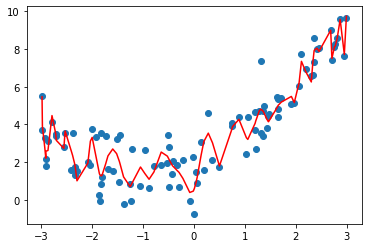

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
# 最高幂为100的情况
poly10_reg = PolynomialRegression(degree=100)
poly10_reg.fit(X, y)
# 得到预测数据集，打印MSE
y10_predict = poly10_reg.predict(X)
print("mean_squared_error"+str(mean_squared_error(y, y10_predict)))
#画图
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

## 欠拟合的情况

准确率0.4953707811865009


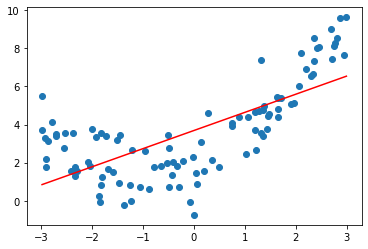

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("准确率"+str(lin_reg.score(X, y)))

y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

# 学习曲线(Learning Curve)

## 原理

- 学习曲线表示，随着训练样本的增多，模型的表现能力
- 图形的纵轴代表误差
- 欠拟合, 训练和测试的误差都很大
- 过拟合, 训练和测试的误差虽然小, 但是二者的差变大
- 完美状态, 二者差距很小, 并且loss值很小
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423011447.jpg)  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423011504.jpg)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423011513.jpg)

## Sklearn实现

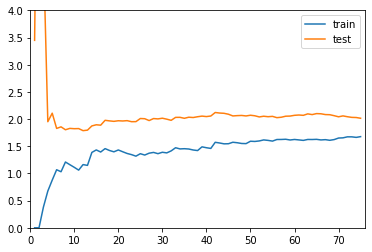

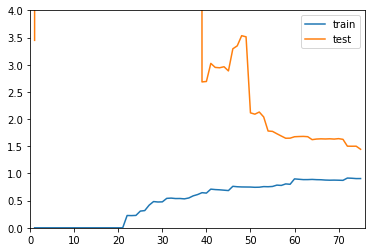

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 生成数据
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)
# 分离数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train) + 1):
        # 依次取1,1-2,1-3,1-4,1-5
        algo.fit(X_train[:i], y_train[:i])
        # 将数据加入train_score = []
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        # 将数据加入test_score = []
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    # 画图
    plt.plot([i for i in range(1,
                               len(X_train) + 1)],
             np.sqrt(train_score),
             label="train")
    plt.plot([i for i in range(1,
                               len(X_train) + 1)],
             np.sqrt(test_score),
             label="test")
    plt.legend()
    plt.axis([0, len(X_train) + 1, 0, 4])
    plt.show()


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])


# 画欠拟合
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)
# 画过拟合
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)

# 交叉验证(Cross Validation)

## 原理

- 不进行交叉验证会对测试数据进行过拟合
- 将数据分为训练train，验证validation，测试test数据集
- k-folds，把训练数据集(包括验证数据集)分成k分：慢了k倍
- LOO-CV(留一法),将m个数据集分为m-1分：完全不受随机测试数据的影响：计算量巨大  
  
    1. 对于小规模样本集（几万量级），常用的分配比例是 60% 训练集、20% 验证集、20% 测试集。
    2. 对于大规模样本集（百万级以上），只要验证集和测试集的数量足够即可，例如有 100w 条数据，那么留 1w 验证集，1w 测试集即可。1000w 的数据，同样留 1w 验证集和 1w 测试集。
    3. 超参数越少，或者超参数很容易调整，那么可以减少验证集的比例，更多的分配给训练集。  

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423013358.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423013418.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423013430.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423014358.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423014412.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423014422.png)

## 实现

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#载入数据
digits = datasets.load_digits()
X = digits.data
y = digits.target
#不进行交叉验证
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k, best_p, best_score = k, p, score        
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 3
Best P = 4
Best Score = 0.9860917941585535


In [17]:
#进行交叉验证
from sklearn.model_selection import cross_val_score
#载入knnClassifier
knn_clf = KNeighborsClassifier()
#对训练数据使用交叉验证，默认分为k=5组 cross_val_score(knn_clf, X_train, y_train, cv=5)
cross_val_score(knn_clf, X_train, y_train)
#使用for循环搜索
best_k, best_p, best_score = 0, 0, 0
for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_k, best_p, best_score = k, p, score
            
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

Best K = 2
Best P = 2
Best Score = 0.9851507321274763


0.980528511821975

In [18]:
#网格搜索自带交叉验证
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights': ['distance'],
    'n_neighbors': [i for i in range(2, 11)],
    'p': [i for i in range(1, 6)]
}]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1,cv=5)
grid_search.fit(X_train, y_train)

print("grid_search.best_score_" + str(grid_search.best_score_))
print("grid_search.best_params_" + str(grid_search.best_params_))
best_knn_clf = grid_search.best_estimator_
print("best_knn_clf.score" + str(best_knn_clf.score(X_test, y_test)))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


grid_search.best_score_0.9851507321274763
grid_search.best_params_{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
best_knn_clf.score0.980528511821975


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   26.9s finished


# 偏差和方差(bias-variance)

## 解释

- 模型的误差 = 偏差 + 方差 + 误差(噪声)

- 偏差
  - 本身假设错误
  - 非线性数据使用线性回归
  - 欠拟合

- 方差
  - 使用的模型太过复杂
  - 过拟合
  - 天生高方差算法KNN

- 降低偏差会提高方差，反之亦然

- 机器学习挑战来自于方差

- 解决方差的手段
  1. 降低模型复杂度
  2. 降维；降噪
  3. 增加样本数
  4. 使用验证数据集  
  5. **模型的正则化**  

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423024403.png)

# numpy

##  基础操作

### numpy.array

In [26]:
import numpy as np
data=np.arange(15).reshape(3,5)
data.shape

(3, 5)

### np.ones & np.ones 

0和1

In [27]:
#创建为0的矩阵 
# zeros(shape, dtype=float, order='C')
np.zeros(10,dtype=np.float64)

# 创建二维的矩阵
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### np.arange 

生成矩阵

In [28]:
# 生成一个由启示 终止 和 步长 决定的numpy矩阵
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

### np.linspace

一段距离生成多少个

In [29]:
# 给定一个范围攫取多少点,右侧为包括此范围
# np.linspace(['start', 'stop', 'num=50', 'endpoint=True', 'retstep=False', 'dtype=None', 'axis=0'])
np.linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### np.random

In [30]:
#生成随机数,前闭后开
# randint(low, high=None, size=None, dtype='l')
np.random.randint(0,10,size=(3,4))

array([[9, 5, 9, 7],
       [2, 4, 2, 0],
       [4, 1, 0, 2]])

### np.random.seed

保证结果可重复

In [31]:
np.random.seed(666)
np.random.randint(0,10,size=(3,4))

array([[2, 6, 9, 4],
       [3, 1, 0, 8],
       [7, 5, 2, 5]])

### np.random.normal 

loc：float  
    此概率分布的均值（对应着整个分布的中心centre）  
scale：float  
    此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）

In [32]:
# normal(loc=0.0, scale=1.0, size=None)
np.random.normal(10,2,(2,2))

array([[10.96062975,  8.58946532],
       [11.34136877, 10.86809388]])

## array操作

### 构造数组

In [33]:
x = np.arange(15).reshape(3,5)
print(x)
# 维度
x.ndim
# 维度元组
x.shape
# 元素个数
x.size

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


15

### 数据访问,截取,拷贝

In [34]:
# 索引特定元素的方法
print("索引: "+str(x[1,0]))
# 切片操作
print("切片操作: "+str(x[1:3:1,2:4:1]))
# 取某一行
print("取某一行: "+str(x[0:1:1,::]))
# 取某一列
print("取某一列: "+str(x[0::,0:1:1]))
# 深度拷贝
sub_x = x[0::,0:1:1].copy()

索引: 5
切片操作: [[ 7  8]
 [12 13]]
取某一行: [[0 1 2 3 4]]
取某一列: [[ 0]
 [ 5]
 [10]]


### reshape

In [35]:
# 可以用-1代替不确定
X = x.reshape(5,-1) 
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

## 合并和分割

### 合并操作

In [36]:
x = np.array([[1,2,3],[4,5,6]])
np.concatenate((x,x),axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [37]:
np.hstack([x,x])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [38]:
np.vstack([x,x])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

### 分离操作

In [39]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
# numpy.split(ary, indices_or_sections, axis)
# indices_or_sections：果是一个整数，就用该数平均切分，如果是一个数组，为沿轴切分的位置（左开右闭）
# np.hsplit & np.vsplit
X1,X2,X3 = np.split(x,[1,2],axis=1)
print(X1)
print(X2)
print(X3)

[[1]
 [4]]
[[2]
 [5]]
[[3]
 [6]]


## 运算

### 单个矩阵的加减乘除

In [41]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
# 加减乘除
print(x+3)
print(x-3)
print(x*3)
print(x/3)

[ 3  4  5  6  7  8  9 10 11 12 13 14]
[-3 -2 -1  0  1  2  3  4  5  6  7  8]
[ 0  3  6  9 12 15 18 21 24 27 30 33]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667
 2.         2.33333333 2.66666667 3.         3.33333333 3.66666667]


### 数学函数运算log,min,max

In [43]:
np.max(x)

11

### 两个矩阵运算

In [44]:
A = np.arange(12).reshape(3,4)
B = np.arange(12).reshape(4,3)
print(A)
print(B )

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


矩阵的乘法dot,一般的加加减乘除需要保证shape一致

In [45]:
# 点乘法,矩阵乘法
print(A.dot(B))
# 转置
print(A.T)
# 向量和矩阵运算
a = np.arange(4)
print(A * a)
# 矩阵的逆运算，逆矩阵
# np.linalg.inv()
a = np.array([[1,2,3],
              [4,5,7],
              [7,8,9]])
print(a.dot(np.linalg.pinv(a)))

[[ 42  48  54]
 [114 136 158]
 [186 224 262]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
[[ 0  1  4  9]
 [ 0  5 12 21]
 [ 0  9 20 33]]
[[ 1.00000000e+00  2.33146835e-15 -1.66533454e-16]
 [-1.66533454e-16  1.00000000e+00  9.43689571e-16]
 [-2.77555756e-16  3.33066907e-16  1.00000000e+00]]


## 聚合操作

In [46]:
# 和
print(np.sum(a,axis=1))
# 乘积
print(np.product(a,axis=1))
# 中位数,平均数,可以加axis
print(np.mean(a))
print(np.median(a))
# 百分位点求值
a = np.arange(100)
print(np.percentile(a,q=25))

[ 6 16 24]
[  6 140 504]
5.111111111111111
5.0
24.75


## 乱序,排序,条件索引

In [47]:
# 打乱循序
np.random.shuffle(a)
print(a)

# 排序
a.sort()
print(a)

# 生成某个条件索引
print(a<50)

# 将索引序号传入
print(a[a>50])

# 有任意满足某一条件
print(np.any(a>20))

# 全部满足某一条件
print(np.all(a>20))

# 两个 求 交集用 & 位运算
np.sum((a>3) & (a<8))

[ 3 43 93 80 60 44  1 75 31 74 62  7 30 69 59  0 97 72 22 49 41 37 82 90
 48 68  8 73 24 28  6 32 71 52 53 61 88 50 15 70 10 39 17 13 84 67 95 92
 98 56 20 55 18 12  4 58 76 25 91 65 35 29 21 66 40 19 96 54 11 23 63 81
 89 51  9 78 57 79 83 85 34  2 86 38 14 27 87 64 33 45 42  5 26 99 77 16
 47 46 94 36]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False Fals

4

# matplotlib

## 画线图

Text(0, 0.5, 'this is y axis')

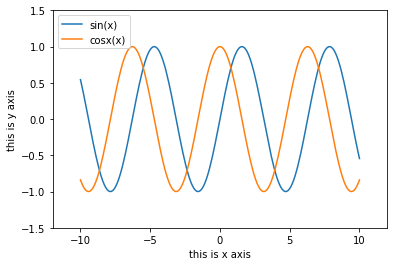

In [48]:


import matplotlib.pyplot as plt
import numpy as np

sinx = np.linspace(-10,10,200)
cosx = sinx.copy()
siny = np.sin(sinx)
cosy = np.cos(cosx)

plt.plot(sinx,siny,label="sin(x)")
plt.plot(cosx,cosy,label="cosx(x)")
plt.legend() # 加上标记
plt.xlim(-12,12)
plt.ylim(-1.5,1.5)
plt.xlabel("this is x axis")
plt.ylabel("this is y axis")



## 画散点图

Text(0, 0.5, 'this is y axis')

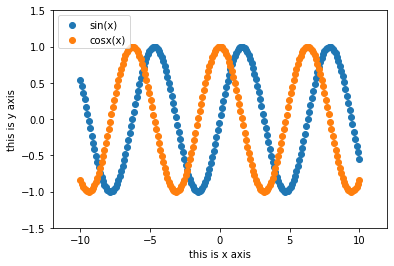

In [49]:
# 画散点图

plt.scatter(sinx,siny,label="sin(x)")
plt.scatter(cosx,cosy,label="cosx(x)")
plt.legend()
plt.xlim(-12,12)
plt.ylim(-1.5,1.5)
plt.xlabel("this is x axis")
plt.ylabel("this is y axis")

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/KNN_K%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-means聚类算法

## 原理

### 步骤

- 求距离
    - result = np.sqrt(np.sum((x_train - i) ** 2, axis=1))  
      
      
- 寻找最小的k个距离
    - result_index = np.argsort(result)[:k]  
      
      
- 统计
    - votes = Counter(predict_result)

### 基础原理

距离相近的数据大概率拥有相同的特性  
  
  
欧拉距离:
    $$ d=\sqrt{ \sum_{i=1}^{n}(x_{i}^{a} - x_{i}^{b})^2} $$  
曼哈顿距离:  
    $$ d=\sum_{i=1}^{n}\left|(x_{i}^{a} - x_{i}^{b})\right| $$ 
明可夫距离:  
    $$ d={(\sum_{i=1}^{n}\left|x_{i}^{a} - x_{i}^{b}\right|^p}) ^\frac{1}{p}$$ 

### 考虑距离的优化

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200421103414.jpg)

### 优点与缺点

1. 优点  
    - 算法简单
    - 天然可以解决多分类问题  
      
      
2. 缺点
    - 效率低下(m个样本,n个特征,时间成本O(m*n))
    - 高度数据相关
    - 预测的结果不具有可解释性
    - 维数灾难
      - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200421103428.jpg)

## 底层实现

In [1]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, data):
        self.data = data

    def split_data(self, ratio):
        index = np.random.permutation(len(self.data.target))
        train_data_size = int(len(index) * ratio)
        index_train = index[:train_data_size]
        index_text = index[train_data_size:]
        x_train = self.data.data[index_train]
        y_train = self.data.target[index_train]
        x_text = self.data.data[index_text]
        y_text = self.data.target[index_text]
        return x_train, y_train, x_text, y_text

    def do_knn(self, x_train, y_train, x_text, y_text, k):
        final = np.array([])
        for i in x_text:
            result = np.sqrt(np.sum((x_train - i) ** 2, axis=1))
            result_index = np.argsort(result)[:k]
            predict_result = y_train[result_index]
            votes = Counter(predict_result)
            final_results = votes.most_common(1)[0][0]
            final = np.append(final, final_results)
        accuracy = sum(final == y_text) / len(y_text)
        return "准确率是:" + str(accuracy)

In [2]:
import sklearn.datasets as datasets
data = datasets.load_iris()
knn = KNN(data)
x_train, y_train, x_text, y_text = knn.split_data(0.8)
knn.do_knn(x_train, y_train, x_text, y_text,k=3)

'准确率是:0.9333333333333333'

## sklearn中的实现

### 通用流程

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#加载数据
digits = datasets.load_digits()
x = digits.data
y = digits.target

#分离数据
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#训练数据
knn= KNeighborsClassifier(n_neighbors=3,n_jobs=2)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

1.0

### 手动寻找参数p

In [4]:
best_p = 0.0
best_k = 0.0
best_accuracy = 0.0

for p in range(1, 20):

    # k的值必须大于0
    for k in range(1, 20):
        knn = KNeighborsClassifier(
            n_neighbors=k, n_jobs=2, weights="distance", p=p)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_p = p
            best_k = k
print("best_accuracy = {a}".format(a=best_accuracy))
print("best_p = {a}".format(a=best_p))
print("best_k = {a}".format(a=best_k))

best_accuracy = 1.0
best_p = 2
best_k = 3


### 网格搜索参数p

In [5]:
# (自带交叉验证)
param_grid = [
    {
        "weights": ["uniform", "distance"],
        "n_neighbors": [i for i in range(1, 10)],
        "p": [i for i in range(1, 10)]
    }
]

In [6]:
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
#传入算法与网格参数
grid_search = GridSearchCV(knn,param_grid,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)
# 打印最好的参数
grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.3min finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=5,
                     weights='uniform')

In [7]:
# 训练时的最好成绩
grid_search.best_score_

0.9867813588850174

In [8]:
# 最好的参数
grid_search.best_params_

{'n_neighbors': 1, 'p': 5, 'weights': 'uniform'}

In [9]:
# 把最高的模型赋值给new_knn_clf
new_knn_clf = grid_search.best_estimator_
new_knn_clf.score(X_test, y_test)

1.0

In [10]:
new_knn_clf.predict(X_test)

array([7, 1, 5, 0, 1, 2, 6, 5, 6, 5, 7, 4, 3, 4, 9, 0, 8, 5, 1, 7, 6, 3,
       3, 4, 5, 1, 7, 9, 7, 9, 8, 0, 9, 2, 2, 0, 2, 4, 3, 8, 9, 1, 0, 1,
       9, 0, 1, 2, 0, 0, 5, 7, 0, 7, 5, 1, 8, 4, 1, 4, 2, 6, 6, 9, 2, 6,
       3, 6, 6, 4, 6, 1, 2, 4, 5, 1, 2, 7, 6, 4, 1, 3, 0, 9, 7, 3, 8, 4,
       5, 1, 3, 2, 2, 3, 8, 9, 9, 5, 7, 7, 2, 9, 2, 4, 5, 5, 3, 0, 9, 4,
       2, 8, 3, 7, 5, 3, 6, 6, 1, 3, 3, 9, 7, 3, 2, 4, 7, 9, 0, 5, 2, 0,
       0, 3, 1, 8, 4, 4, 4, 6, 5, 8, 9, 9, 5, 1, 2, 7, 1, 7, 9, 1, 5, 5,
       2, 4, 2, 2, 8, 1, 5, 7, 5, 0, 9, 7, 2, 2, 8, 3, 2, 8, 0, 6, 2, 1,
       5, 5, 0, 7, 0, 4, 8, 1, 8, 6, 3, 5, 4, 8, 8, 5, 6, 7, 2, 4, 6, 9,
       9, 4, 8, 3, 9, 6, 0, 0, 9, 0, 4, 0, 6, 3, 6, 2, 7, 4, 8, 8, 7, 1,
       8, 1, 4, 2, 1, 3, 2, 8, 1, 4, 5, 6, 4, 3, 4, 9, 2, 7, 3, 5, 2, 1,
       1, 5, 5, 3, 3, 3, 4, 1, 6, 0, 1, 3, 9, 9, 5, 6, 2, 2, 9, 9, 3, 9,
       3, 8, 7, 9, 8, 0, 8, 3, 4, 8, 6, 8, 2, 8, 8, 7, 1, 2, 0, 6, 0, 8,
       1, 7, 5, 0, 3, 0, 0, 7, 9, 9, 2, 7, 3, 3, 7,

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 线性回归算法

## 原理

### 步骤

- 根据公式求出系数
- 比较系数预测的结果和真实的结果

### 解释
   对于一些数据存在这么一条线,最大程度的拟合所有数据  
   目标找到a,b,使得  $ \sum_{i=1}^{m}(y^{(i)} - ax^{(i)}- b)^2 $ 的值尽可能的小  
   这个值通常叫做损失函数(loss function)

### 基本公式
### 最小二乘法(Least squares)

$$ a = \dfrac{\sum_{i=1}^{m}(x^{(i)} - \hat{x})(y^{(i)} - \hat{y})}{\sum_{i=1}^{m}(x^{(i)} - \hat{x})^2} $$  
$$ b = \hat{y} - a\hat{x}$$   
<center> note:使用向量化加速运算 </center>

### 多元线性回归公式

应该怎么从一大堆数据里求出回归方程呢？假定输入数据存放在矩阵X中，结果存放在向量y中:  
$$
X=\left[\begin{array}{lll}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33}
\end{array}\right], y=\left[\begin{array}{l}
y_{1} \\
y_{2} \\
y_{3}
\end{array}\right]
$$

而回归系数存放在向量w中：  
$$
\omega=\left[\begin{array}{l}
\omega_{1} \\
\omega_{2} \\
\omega_{3}
\end{array}\right]
$$
那么对于给定的数据x1，即矩阵X的第一列数据，预测结果u1将会通过如下公式给出：  
$$
u_{1}=\left[\begin{array}{l}
x_{11} \\
x_{21} \\
x_{31}
\end{array}\right]^{T} *\left[\begin{array}{l}
\omega_{1} \\
\omega_{2} \\
\omega_{3}
\end{array}\right]
$$
平方误差和可以写做:  
$$
\sum_{i=1}^{m}\left(y_{i}-x_{i}^{T} \omega\right)^{2}
$$
用矩阵表示还可以写做：
$$
(y-X \omega)^{T}(y-X \omega)
$$

# Sklearn实现

## 自我实现(最小二乘)

In [1]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self):
        """初始化Simple Linear Regression模型"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集x_train, y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        #向量化运算
        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / (
            x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert self.a_ is not None and self.b_ is not None, \
            "must fit before predict!"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x，返回x的预测结果值"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearRegression()"

## 自我实现多元线性回归

In [2]:
import numpy as np
from sklearn.metrics import r2_score

class LinearRegression:

    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def fit_normal(self, X_train, y_train):
        """根据训练数据集X_train, y_train训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)

    def __repr__(self):
        return "LinearRegression()"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
x = boston.data
y = boston.target
# 预先处理
x = x[y < 50]
y = y[y < 50]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=666)
reg = LinearRegression()
reg.fit_normal(X_train,y_train)
reg.score(X_test,y_test)

0.8129794056212925

## 使用sklearn多元线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.8129794056212811

# 梯度下降法(Gradient-Descent)

## 原理

### 概念

   - 不是一个机器学习的算法
   - 是一种基于搜索的最优化方法
   - 作用: 最小化一个损失函数
   - 梯度上升法: 最大化一个效用函数

- [](![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422204644.png)
)

### 步骤

- 先找到目标函数,比如
$$ y=x+b $$
- 求解损失函数$J({\theta})$, 比如用MSE,也叫标准差
$$J=\sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}$$ 
- 求损失函数的导数, 求解最小值或最大值
$$J(\theta)=\frac{1}{2 m} \sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}$$
- 利用梯度公式,实现惩罚机制,更新$\theta$
$$\theta = \theta - \alpha {f_{loss}}'(\theta)$$

### 注意事项

* 学习率的问题
* 要数据归一化
* $X_0$ 添加一列为1
* 某一函数有多个极值点: 解决方法-多次运行-随机化初始点
* 将两次theta至变化小于1e-8时，可以认为到达了极值

## 分类

### 批量梯度下降法(BGD)

- 批量梯度下降法是最原始的形式
- 表达式递推到具有m个训练样本
- 然后对损失函数求导
$$\frac{\partial J\left(\Theta_{0}, \Theta_{1}\right)}{\partial \Theta_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left(H_{\Theta}\left(X^{(i)}\right)-Y^{(i)}\right) X_{j}^{(i)}$$  
$$\Theta_{j}=\Theta_{i}-\alpha \frac{1}{m} \sum_{i=1}^{m}\left(H_{\Theta}\left(X^{(i)}\right)-Y^{(i)}\right) X_{j}^{(i)}$$  

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422205146.png)

- 优点：
    1. 一次迭代是对所有样本进行计算，此时利用矩阵进行运算，实现了并行。
    2. 由全数据集确定的方向能够更好地代表样本总体，从而更准确地朝向极值所在的方向。
    3. 当目标函数为凸函数时，批量梯度下降一定能够得到全局最优解
- 缺点
    1. 有时我们会遇到样本数目 m 很大的训练集合，如果有几十上百万，甚至上亿的训练样本。
    2. 这意味着我们每执行一次批梯度下降算法，都要对m个样本进行求和。
    3. 这样会导致，训练过程很慢，花费很长的时间。

### 随机梯度下降法(SGD)

- 随机梯度下降是每次迭代使用一个样本来对参数进行更新
- 使得训练速度加快。
$$\frac{\Delta J^{(i)}\left(\theta_{0}, \theta_{1}\right)}{\theta_{j}}=\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$$  
$$\theta_{j}:=\theta_{j}-\alpha\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$$

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422205626.png)

- $\eta$ 称为学习率(learning rate)  
- $\eta$ 的取值影响获得最优解的速度  
- $\eta$ 取值不合适，甚至得不到最优解  
- $\eta$ 是梯度下降法的一个超参数  

- 优点：
    1. 由于不是在全部训练数据上的损失函数，而是在每轮迭代中，随机优化某一条训练数据上的损失函数，这样每一轮参数的更新速度大大加快。
- 缺点
    1. 准确度下降。由于即使在目标函数为强凸函数的情况下，SGD仍旧无法做到线性收敛。
    2. 可能会收敛到局部最优，由于单个样本并不能代表全体样本的趋势。
    3. 不易于并行实现。

### 小批量梯度下降法(MBGD)

- 小批量梯度下降算法是介于批量梯度下降算法和随机梯度下降算法之间的算法
- batchsize=100指的是每次取100个样本训练。所以需要迭代300000/100=3000次。

batchsize=3000
$$\theta_{j}=\theta_{j}-\alpha * \frac{1}{3000} \sum_{i}^{3000}\left(h_{\theta}\left(x^{i}\right)-y^{i}\right) * x_{j}^{i}$$

- 优点：
    1. 通过矩阵运算，每次在一个batch上优化神经网络参数并不会比单个数据慢太多。
    2. 每次使用一个batch可以大大减小收敛所需要的迭代次数，同时可以使收敛到的结果更加接近梯度下降的效果。(比如上例中的30W，设置batch_size=100时，需要迭代3000次，远小于随机梯度下降的30W次)
    3. 可实现并行化。
- 缺点：
    1. batch_size的不当选择可能会带来一些问题。

## Sklearn实现

### 自我实现

In [1]:
import numpy as np
from sklearn.metrics import r2_score

class LinearRegression:

    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None
    
    #批量梯度下降
    def fit_gd(self, X_train, y_train, eta=0.001, n_iters=1e4):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        
        #求损失函数
        def J(theta, X_b, y):
            try:
                return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
            except:
                return float('inf')
        
        #求导损失函数
        def dJ(theta, X_b, y):
            return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)
        
        #运行梯度下降
        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
            theta = initial_theta
            cur_iter = 0
            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                cur_iter += 1
            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self
    
    #随机梯度下降
    def fit_sgd(self, X_train, y_train, n_iters=5, t0=5, t1=50):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert n_iters >= 1

        def dJ_sgd(theta, X_b_i, y_i):
            return X_b_i * (X_b_i.dot(theta) - y_i) * 2.

        def sgd(X_b, y, initial_theta, n_iters, t0=5, t1=50):

            def learning_rate(t):
                return t0 / (t + t1)
            theta = initial_theta
            m = len(X_b)

            for cur_iter in range(n_iters):
                
                #随机选取一个数据
                indexes = np.random.permutation(m)
                X_b_new = X_b[indexes]
                y_new = y[indexes]
                for i in range(m):
                    gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
                    theta = theta - learning_rate(cur_iter * m + i) * gradient
            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.random.randn(X_b.shape[1])
        self._theta = sgd(X_b, y_train, initial_theta, n_iters, t0, t1)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self
    
    #预测
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)
    
    #准确率
    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)

    def __repr__(self):
        return "LinearRegression()"

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
x = boston.data
y= boston.target

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standerscaler = StandardScaler()
x = standerscaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

gradient_descent = LinearRegression()
gradient_descent.fit_gd(x_train,y_train)

LinearRegression()

In [4]:
gradient_descent.score(x_test,y_test)

0.763488198838198

### sklearn 中的实现

In [5]:
from sklearn import datasets
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
x = boston.data
y= boston.target
x = x[y <50.0]
y = y[y <50.0]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

standerscaler = StandardScaler()
standerscaler.fit(x_train)
x_train_scaler = standerscaler.transform(x_train)
x_test_scaler = standerscaler.transform(x_test)

In [6]:
lin_reg = SGDRegressor(tol=1e-4)
lin_reg.fit(x_train_scaler,y_train)
lin_reg.score(x_test_scaler,y_test)

0.716269351692778

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主成分分析法

## 原理

### 定义
- PCA(Principal Component Analysis)，即主成分分析方法，
- 是一种使用最广泛的数据降维算法。  
- PCA的主要思想是将n维特征映射到k维上,k<n.
- 这k维是全新的正交特征也被称为主成分
- 是在原有n维特征的基础上重新构造出来的k维特征。 
- 使多维的数据映射到一条轴上(向量乘法)   
- 使映射的点尽可能分散(梯度上升)
 

### 降维的好处:
  - 使得数据集更易使用。
  - 降低算法的计算开销。
  - 去除噪声。
  - 使得结果容易理解。  
  - 降到二维后，可以可视化关系
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422213320.jpg)

### 步骤

#### 让均值归零

- demean
- 原函数  
$$\operatorname{Var}\left(X_{\text {project}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left\|X_{\text {projet}}^{(i)}-\bar{X}_{\text {project}}\right\|^{2}$$
- 均值归零(可以简化方差算法)
$$\operatorname{Var}\left(X_{\text {propect}}\right)=\frac{1}{m} \sum_{i=1}^{m}\left\|X_{\text {poject}}^{(i)}\right\|^{2}$$

In [0]:
def demean(X):
    # axis=0即按列计算均值，及每个属性的均值，1则是计算行的均值
    return (X - np.mean(X, axis=0))

#### 求出w轴的的向量

- 将x映射到w向量的方差
  - $$\text { 使得 } \operatorname{Var}\left(X_{\text {projac}}\right)=\frac{1}{m} \sum_{r=1}^{m}\left(X^{(i)} \cdot w\right)^{2} \quad \text { 最大 }$$
  - 也就是每个点到这条线的映射相距够远
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422214207.png)
  - w是单位向量, $X^{(i)}$已知向量, $X^{(project)}$是在w上的映射
  - w是单位向量
  - $$X^{(i)} \cdot w=\left\|X_{p \text { project }}^{(i)}\right\|$$
- 求导(斜率或者叫梯度)
  - $$
\nabla f=\frac{2}{m}\left(\begin{array}{c}
\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{1}^{(i)} \\
\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{2}^{(i)} \\
\cdots \\
\sum_{i=1}^{m}\left(X^{(i)} w\right) X_{n}^{(n)}
\end{array}\right)=\frac{2}{m} \cdot X^{T}(X w)
$$
  - w为单位向量
- 梯度上升求最大值
  - $$ w=w+e t a * gradient$$

#### 求第n的主成分

- 求出去掉上一个主成分向量的方向的数据 
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200422215256.jpg)
$$X^{'(i)}=X^{(i)}-X_{\text {project}}^{(i)} $$
- 利用这个数据再求轴  
  - $$\text { 使得 } \operatorname{Var}\left(X_{\text {projac}}\right)=\frac{1}{m} \sum_{r=1}^{m}\left(X^{(i)} \cdot w\right)^{2} \quad \text { 最大 }$$

## Sklearn中的实现

### 自我实现

#### 二维数据的PCA

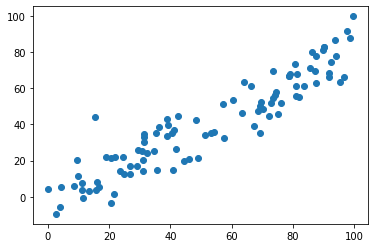

In [1]:
# 生成数据
import numpy as np
import matplotlib.pyplot as plt
X = np.empty((100, 2))
# 随机生成变量
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

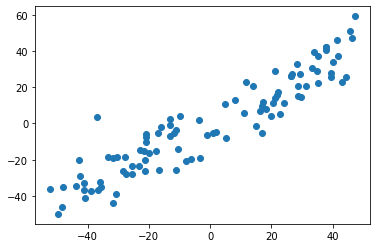

In [2]:
'''均值归零'''
def demean(X):
    # axis=0即按列计算均值，及每个属性的均值，1则是计算行的均值
    return (X - np.mean(X, axis=0))

X_demean = demean(X)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [3]:
'''方差函数'''
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

'''方差函数导数'''
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

'''将向量化简为单位向量'''
def direction(w):
    return w / np.linalg.norm(w)

'''梯度上升法'''
def gradient_ascent(w, X, eta, n_iter=1e4, epsilon=0.0001):
    '''
    梯度上升法
    :param w:
    :param X:
    :param eta:
    :param n_iter:
    :param epsilon:
    :return:
    '''
    #先化简w为单位向量，方便运算
    w = direction(w)
    i_iter = 0
    while i_iter < n_iter:
        gradient = df_math(w, X)
        last_w = w
        w += gradient * eta
        #每次更新后将w化简为单位向量
        w = direction(w)
        if abs(f(w, X) - f(last_w, X)) < epsilon:
            break
        i_iter += 1
    return w

[0.76313597 0.64623795]


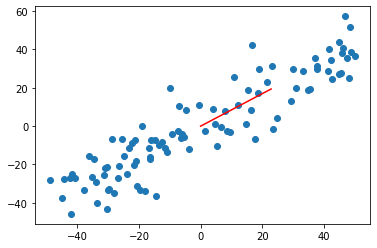

In [0]:
w_init = np.random.random(X_demean.shape[1])
eta = 0.01
w = gradient_ascent(w_init, X_demean, eta)
print(w)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
# 以0点为基准, 横坐标w[0], 纵坐标w[1]
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

#### 多维数据的PCA

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:

    def __init__(self, n_component):
        assert n_component >= 1, 'n_component is invalidate'
        self.n_component = n_component
        self.components_ = None

    def __repr__(self):
        return 'PCA(n_component=%d)' % self.n_component

    def fit(self,X, eta, n_iter=1e4, epsilon=0.0001):
        '''
        主成分分析
        :param X: 
        :param eta: 
        :param n_iter: 
        :param epsilon: 
        :return: 
        '''
        assert X.shape[1] >= self.n_component, 'X is invalidate'

        '''均值归零'''
        def demean(X):
            return X - np.mean(X, axis=0)

        '''方差函数'''
        def f(w, X):
            return np.sum(X.dot(w)**2) / len(X)

        '''方差函数导数'''
        def df_ascent(w, X):
            return X.T.dot(X.dot(w)) * 2 / len(X)

        '''将向量化简为单位向量'''
        def direction(w):
            return w / np.linalg.norm(w)

        '''寻找第一主成分'''
        def first_component(w, X, eta, n_iter=1e4, epsilon=0.0001):
            i_iter = 0
            while i_iter < n_iter:
                last_w = w
                gradient = df_ascent(w, X)
                w += eta * gradient
                w = direction(w)
                if abs(f(w, X) - f(last_w, X)) < epsilon:
                    break
                i_iter += 1
            return w

        self.components_ = np.empty(shape=(self.n_component, X.shape[1]))
        X = demean(X)
        for i in range(self.n_component):
            w = np.random.random(X.shape[1])
            w = first_component(w, X, eta, n_iter, epsilon)
            X = X - (X.dot(w)).reshape(-1, 1) * w
            self.components_[i, :] = w
        return self

    def transform(self, X):
        '''
        将X映射到各个主成分中
        :param X:
        :return:
        '''
        assert X.shape[1] == self.components_.shape[1]
        return X.dot(self.components_.T)

    def inverse_transform(self, X):
        '''
        将低维数据转回高维
        :param X:
        :return:
        '''
        assert X.shape[1] == self.components_.shape[0]
        return X.dot(self.components_)

[[0.78747374 0.61634821]]
(100, 1)


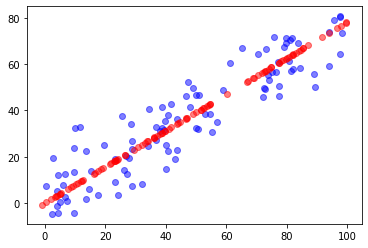

In [0]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)
eta = 0.01

pca = PCA(1)
pca.fit(X, eta)
X_new = pca.transform(X)
print(pca.components_)
print(X_new.shape)
X_inverse = pca.inverse_transform(X_new)
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], color='r', alpha=0.5)
plt.show()

### sklearn 中封装的PAC

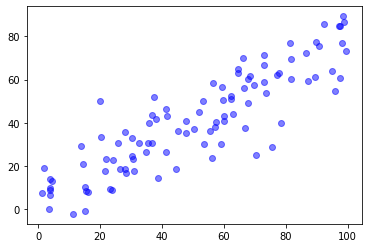

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

'''模拟数据集'''
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size=100)
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.show()

In [5]:
# 可以直接指认要降到几维
pca = PCA(n_components=1)
pca.fit(X)
print(pca.components_)
# 把转化好的数据传回来
X_new = pca.transform(X)
print(X_new.shape)

[[0.78559504 0.618741  ]]
(100, 1)


In [6]:
# 可以查看唯一维度, 还保留多少信息
pca = PCA(n_components=X.shape[1])
pca.fit(X)
pca.explained_variance_ratio_ 

array([0.9424486, 0.0575514])

In [0]:
# 可以按照比例保留信息
pca = PCA(0.95)
pca.fit(X)
print(pca.components_)
X_new = pca.transform(X)
print(X_new.shape)

[[-0.78587802 -0.61838155]
 [-0.61838155  0.78587802]]
(100, 2)


pca.components_: [[0.78559504 0.618741  ]]
X_new: (100, 1)
X_new.shape前五个: [[ 33.03867392]
 [ 12.80150406]
 [-54.11212748]
 [ 16.17355582]
 [ -6.73875607]]


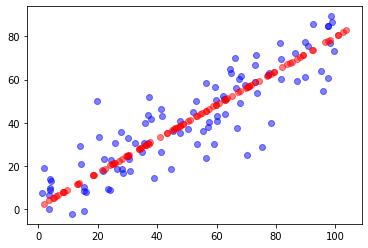

In [11]:
#fit PCA 算法
#降成一维
pca = PCA(n_components=1)
pca.fit(X)
print("pca.components_: "+str(pca.components_))
#降维以后的数据传给X_new
X_new = pca.transform(X)
print("X_new: "+str(X_new.shape))
print("X_new.shape前五个: "+str(X_new[0:5]))
# 可视化需求, 再转成2维
X_inverse = pca.inverse_transform(X_new)
plt.scatter(X[:, 0], X[:, 1], color='b', alpha=0.5)
plt.scatter(X_inverse[:, 0], X_inverse[:, 1], color='r', alpha=0.5)
plt.show()

## PAC例子

### KNN进行PCA

In [22]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

'''真实数据'''
data = dataset.load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
# 不进行PCA
knn_clf = KNeighborsClassifier()
start = time.time()
knn_clf.fit(X_train, y_train)
end = time.time()
print("without PCA the KNN classifier's time cost is %s" % (end - start))
print("without PCA the KNN classifier's test score is %s" % knn_clf.score(X_test, y_test))

without PCA the KNN classifier's time cost is 0.0024509429931640625
without PCA the KNN classifier's test score is 0.9866666666666667


In [23]:
# 使用PCA
# 相当于n_component=2时，
# 只解释了27%左右的数据
knn_clf = KNeighborsClassifier()
pca = PCA(n_components=2)
pca.fit(X_train)
pca.explained_variance_ratio_ 

array([0.14566817, 0.13735469])

In [24]:
X_train_new = pca.transform(X_train)
X_test_new = pca.transform(X_test)
start = time.time()
knn_clf.fit(X_train_new, y_train)
end = time.time()
print("with PCA the KNN classifier's time cost is %s" % (end - start))
print("with PCA the KNN classifier's test score is %s" % knn_clf.score(X_test_new, y_test))

with PCA the KNN classifier's time cost is 0.0016751289367675781
with PCA the KNN classifier's test score is 0.6066666666666667


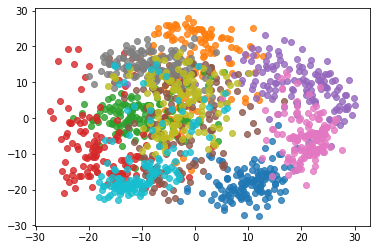

In [25]:
# 可视化降到2维的数据
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_new = pca.transform(X_train)
for i in range(10):
    # 一共有10种分类，for循环运行10次，每次针对一种分类进行scatter
    plt.scatter(X_train_new[y_train == i, 0], X_train_new[y_train == i, 1], alpha=0.8)
plt.show()

In [18]:
# 所有的解释率
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

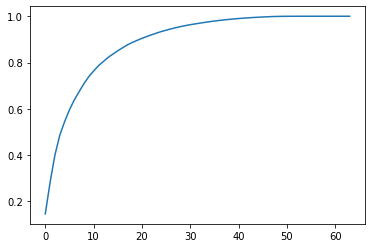

In [19]:
# 可视化解释率
plt.plot([i for i in range(X_train.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [20]:
# 指定保留百分之多少信息
pca = PCA(0.95)
pca.fit(X_train)
pca.n_components_

28

In [21]:
x_test_1 = pca.transform(X_test)
x_train_1 = pca.transform(X_train)
knn_1 = KNeighborsClassifier()
knn_1.fit(x_train_1,y_train)
knn_1.score(x_test_1,y_test)

0.98

## 可视化PCA意义

### 数据的降噪

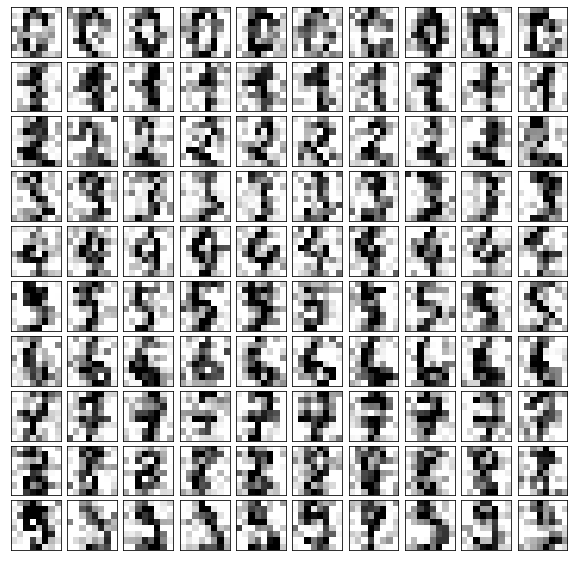

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dataset
from sklearn.decomposition import PCA

'''加载数据'''
data = dataset.load_digits()
X = data.data
y = data.target
#有噪声的数据, 原来的数据加上均值为0，方差为4的噪音
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

# 0的手写数据取10个
example_digits = noisy_digits[y == 0, :][:10]

#取100个样例数据
for i in range(1, 10):
    X_num = noisy_digits[y == i, :][:10]
    example_digits = np.vstack([example_digits, X_num])

'''绘图函数'''
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

'''绘制带有噪声的数据'''
plot_digits(example_digits)
plt.show()

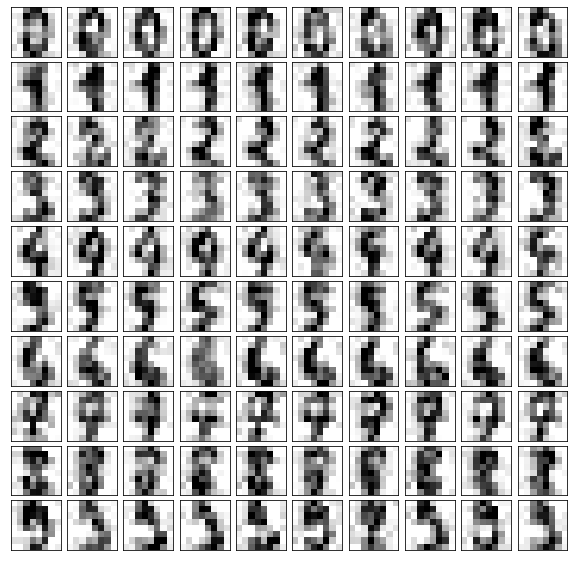

In [27]:
'''PCA数据降噪'''
#这里选用n_component=0.5进行主成分分析
pca = PCA(0.5)
pca.fit(example_digits)
#映射到低维数据example_digits_new
example_digits_new = pca.transform(example_digits)
#再从低维数据映射回高维数据并绘制
example_digits_no_noise = pca.inverse_transform(example_digits_new)
plot_digits(example_digits_no_noise)
plt.show()

### 人脸识别与特征脸

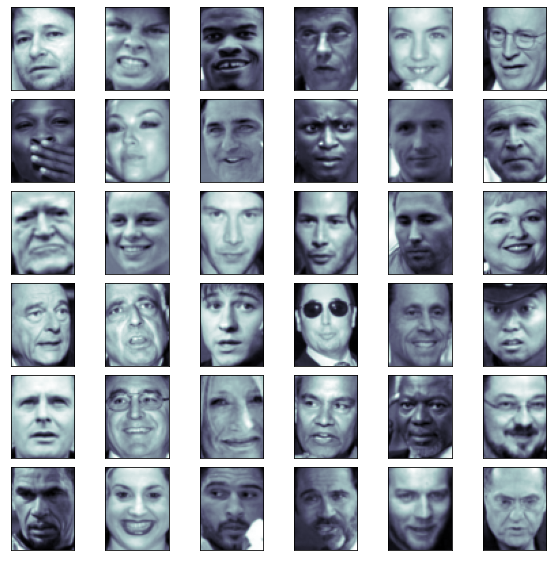

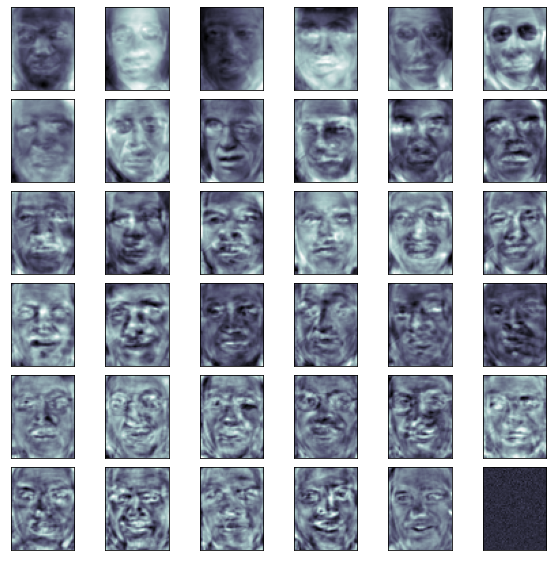

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

'''加载数据'''
face = fetch_lfw_people()

#face数据集的特征集是13233 * 2914的矩阵，打乱顺序，取其中36个进行测试
random_index = np.random.permutation(len(face.data))
X = face.data[random_index]
example_face = X[:36, :]

#绘制原始的人脸
'''绘图函数'''
def plot_faces(data):
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47), cmap='bone')

plot_faces(example_face)
plt.show()

#数据集大，使用随机的方式求解pca，提升效率
pca = PCA(svd_solver='randomized')
pca.fit(example_face)
agent_faces = pca.components_[:36, :]
plot_faces(agent_faces)
plt.show()

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E5%A4%9A%E9%A1%B9%E5%BC%8F%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多项式回归(Polynomial Regression)

## 原理

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423001147.png)  
  
- 简单线性回归无法拟合nihe复杂模型
- 通过增加参数(degree)的方法进行提升
- degree = 3
$$
\begin{aligned}
&1, x_{1}, x_{2}\\
&x_{1}^{2}, x_{2}^{2}, x_{1} x_{2}\\
&x_{1}^{3}, x_{2}^{3}, x_{1}^{2} x_{2}, x_{1} x_{2}^{2}
\end{aligned}
$$

## Sklearn中实现

### 自我实现

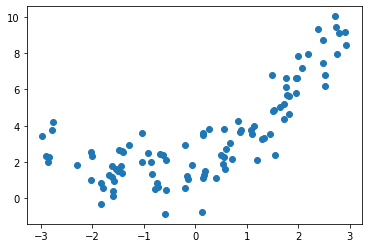

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
#生成数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)
#画图
plt.scatter(x, y)
plt.show()


建立线性回归模型


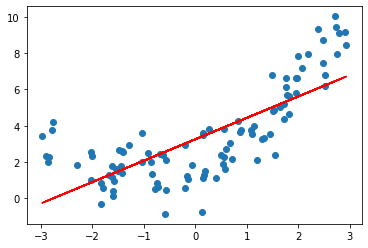

建立多项式回归模型


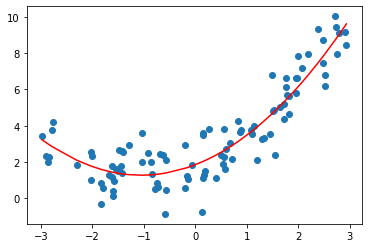

In [5]:
#线性回归
from sklearn.linear_model import LinearRegression
#建立线性回归模型
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
#画图
print("建立线性回归模型")
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

#添加一个参数
X2 = np.hstack([X, X**2])
X2.shape
#建立多项式回归模型
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)
# 画图
print("建立多项式回归模型")
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [6]:
print(lin_reg2.coef_)
print(lin_reg2.intercept_)

[1.09973337 0.52419583]
1.8518814838901312


### 使用sklearn中的PolynomialFeatures

- 将数据PolynomialFeatures
- 生成新的数据
- 传给LinearRegression()
- degree()决定了最好几次幂  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200423001311.jpg)


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
#生成数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# 1.确定PolynomialFeatures最高幂
poly = PolynomialFeatures(degree=2)
# 2.fit训练数据
poly.fit(X)
# 3.生成新的数据
X2 = poly.transform(X)
print("新的数据的shape"+str(X2.shape))

新的数据的shape(100, 3)


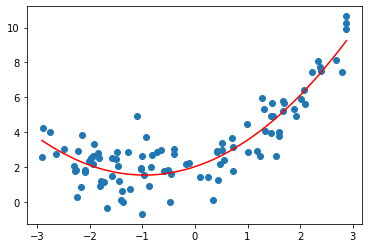

In [9]:
from sklearn.linear_model import LinearRegression
# 可视化
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

### sklearn使用Pipeline简化流程

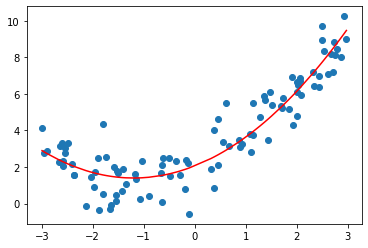

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 生成数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

# Pipeline的步骤
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

## 正则化(Regularization)

### 偏差bias和方差variance

- 模型的误差 = 偏差 + 方差 + 误差(噪声)

- 偏差
  - 本身假设错误
  - 非线性数据使用线性回归
  - 欠拟合

- 方差
  - 使用的模型太过复杂
  - 过拟合
  - 天生高方差算法KNN

- 降低偏差会提高方差，反之亦然

- 机器学习挑战来自于方差

- 解决方差的手段
  1. 降低模型复杂度
  2. 降维；降噪
  3. 增加样本数
  4. 使用验证数据集  
  5. **模型的正则化**  

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423024403.png)

### L2-岭回归(Ridge)

#### 原理

- 是目标函数尽可能小
$$J\left( \theta  \right){\rm{ = }}MSE(y,\hat y;\theta ) + \alpha \frac{1}{2}\sum\limits_{i = 1}^n {\theta _i^2}$$
- 后面的这项就是岭回归
$$\alpha \frac{1}{2}\sum\limits_{i = 1}^n {\theta _i^2}$$
- 岭回归通过最小化$\theta$的和，从而防止过拟合
- 与LASSO回归不同，趋向与让$\theta$为为一更更小的值

#### 代码实现

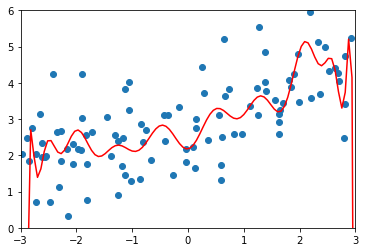

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

# 训练一个过拟合的模型
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])


np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)


def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()


plot_model(poly_reg)

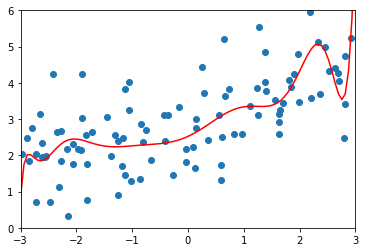

L2正则的α值为 0.0001


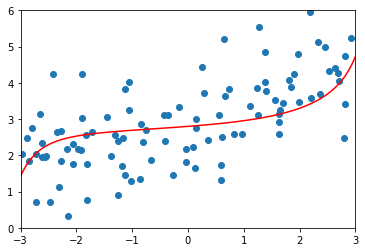

L2正则的α值为 100


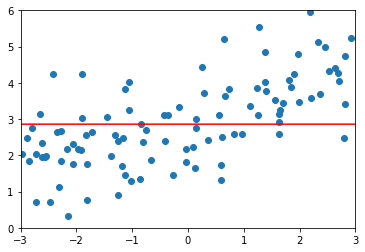

L2正则的α值为10000000,theta全为0


In [4]:
# 使用岭回归

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#pipline初始化模型
def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
# L1正则的α值为 0.0001
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)
y1_predict = ridge1_reg.predict(X_test)
plot_model(ridge1_reg)
print("L2正则的α值为 0.0001")
# L1正则的α值为 1000
ridge3_reg = RidgeRegression(20, 100)
ridge3_reg.fit(X_train, y_train)
y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)
plot_model(ridge3_reg)
print("L2正则的α值为 100")
# L1正则的α值为 10000000，这时theta全为0
ridge4_reg = RidgeRegression(20, 10000000)
ridge4_reg.fit(X_train, y_train)
y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test, y4_predict)
plot_model(ridge4_reg)
print("L2正则的α值为10000000,theta全为0")

### L1-LASSO-Regression

#### 原理

- 是目标函数尽可能小
$$J\left( \theta  \right){\rm{ = }}MSE(y,\hat y;\theta ) + \alpha \frac{1}{2}\sum\limits_{i = 1}^n | {{\theta _i}}|$$
- 后面的这项LASSO Regression
$$\left| {{\theta _i}} \right|$$
- LASSO Regression通过最小化$\theta$的和，从而防止过拟合
- 与岭回归不同，趋向与让$\theta$为0


#### 代码实现

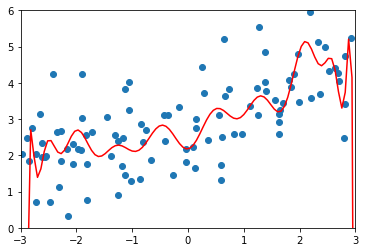

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#生成过拟合模型
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])


poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X_test)


def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()


plot_model(poly_reg)

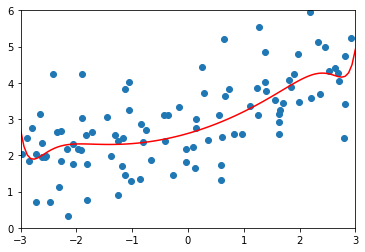

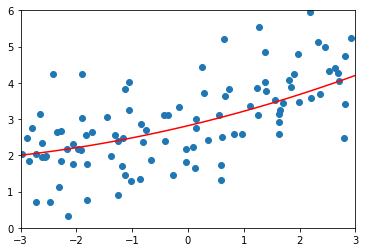

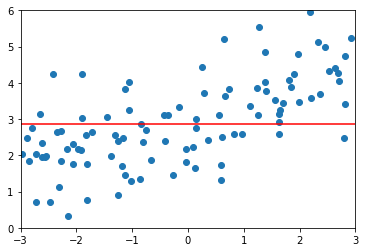

In [22]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_predict = lasso1_reg.predict(X_test)
plot_model(lasso1_reg)

lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_predict = lasso2_reg.predict(X_test)
plot_model(lasso2_reg)

lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)
y3_predict = lasso3_reg.predict(X_test)
plot_model(lasso3_reg)

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 逻辑回归 Logistic Regression

## 原理

- 主要解决分类问题
- 天然的解决二分类问题
- 通过变形可以解决多分类(ovo,ovr)
- 分类用概率衡量指标,数值用r方  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423035625.png)

### Sigmod函数

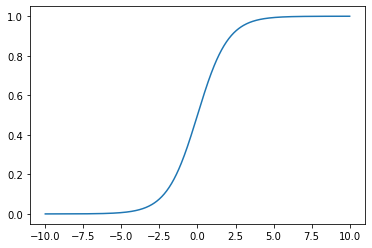

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1. / (1. + np.exp(-t))

x = np.linspace(-10, 10, 500)
plt.plot(x, sigmoid(x))
plt.show()

值域0-1,定义域为0时,值为0.5  
x>0, y>0.5  
x<0, y<0.5  

### 公式推导

1. sigmod函数嵌套sigmod,使值映射到0-1  
$$\hat p = \sigma ({\theta ^T} \cdot {x_b}) = \frac{1}{{1 + {e^{ - {\theta ^t} \cdot {x_b}}}}}$$  
2. 计算cost,使呈现某种惩罚机制(越偏离,惩罚越大)  
$$\cos t = \left\{ {\begin{array}{*{20}{c}}
{ - \log (\hat p)}\\
{ - \log (1 - \hat p)}
\end{array}} \right.{\rm{  }}\begin{array}{*{20}{c}}
{True = 1}\\
{True = 0}
\end{array}.$$
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200418230855.jpg)   
3. 确定损失函数
$$J(\theta )=-\frac{1}{m}\sum\limits_{i = 1}^m {{y^i}\log ({{\hat p}^i}) + (1 - {y^i})\log (1 - {{\hat p}^i})}$$
4. 损失函数求导(不存在数学解,只能梯度下降)
$$J(\theta )'=\frac{1}{m} \cdot X_b^T \cdot (\sigma ({X_b}\theta ) - y)$$




### 自我实现

In [2]:
import numpy as np
import numpy as np
from math import sqrt


class LogisticRegression:
    """初始化Logistic Regression模型"""
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    """sigmod函数"""

    def _sigmoid(self, t):
        return 1. / (1. + np.exp(-t))

    """计算y_true和y_predict之间的准确率"""

    def accuracy_score(self, y_true, y_predict):
        assert len(y_true) == len(y_predict), \
            "the size of y_true must be equal to the size of y_predict"
        return np.sum(y_true == y_predict) / len(y_true)

    """根据训练数据集X_train, y_train, 使用梯度下降法训练Logistic Regression模型"""

    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        """损失函数"""
        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return -np.sum(y * np.log(y_hat) +
                               (1 - y) * np.log(1 - y_hat)) / len(y)
            except:
                return float('inf')

        """损失函数求导"""

        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(y)

        """梯度下降"""

        def gradient_descent(X_b,
                             y,
                             initial_theta,
                             eta,
                             n_iters=1e4,
                             epsilon=1e-8):
            theta = initial_theta
            cur_iter = 0
            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                cur_iter += 1
            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta,
                                       n_iters)
        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

    """给定待预测数据集X_predict，返回表示X_predict的结果概率向量"""

    def predict_proba(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))

    """给定待预测数据集X_predict，返回表示X_predict的结果向量"""

    def predict(self, X_predict):
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"
        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')

    """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return self.accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "LogisticRegression()"

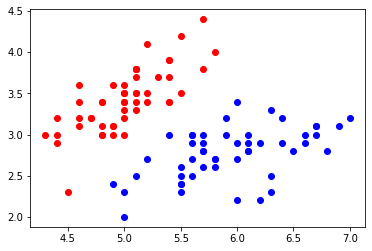

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# 测试数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.96

In [5]:
log_reg.predict_proba(X_test)

array([0.98571554, 0.02603215, 0.84966489, 0.01442144, 0.99577837,
       0.69599006, 0.14301485, 0.03810868, 0.00244301, 0.02847909,
       0.06189945, 0.07519726, 0.97897119, 0.01729645, 0.49818865,
       0.86676755, 0.17057013, 0.5562134 , 0.91168961, 0.85573665,
       0.04654915, 0.01285557, 0.97308329, 0.89564404, 0.00850298])

## 决策边界(Decision-Boundary)

### 二分类数据的决策边界

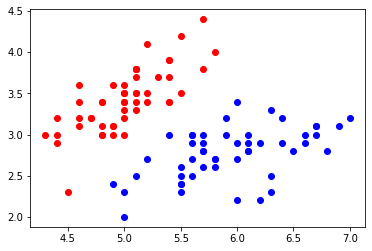

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#载入数据
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

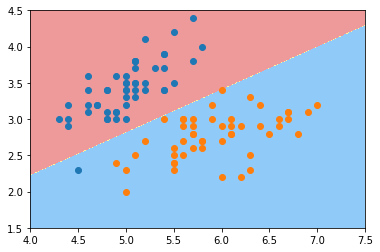

In [7]:
# 画决策边界
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### KNN决策边界

0.88


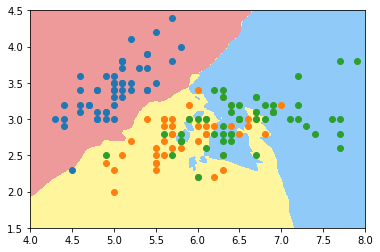

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# 过拟合的决策边界
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)
print(knn_clf_all.score(X_test, y_test))
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

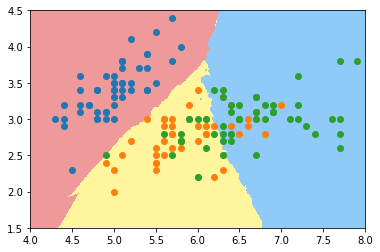

In [9]:
# 减少过拟合,通过增加超参数k
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

## 添加多项式特征

### 圆形边界数据

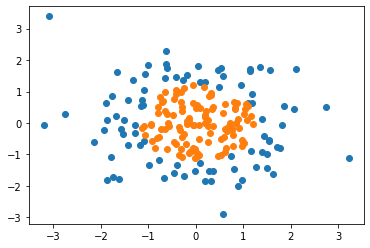

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1]**2)<1.5, dtype='int')
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 简单线性回归的决策边界

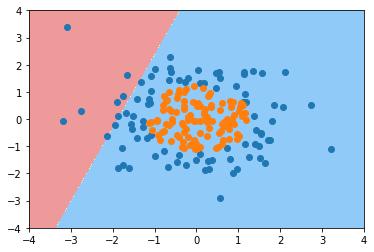

In [12]:
# 简单线性回归的决策边界
log_reg = LogisticRegression()
log_reg.fit(X, y)
#画决策边界
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 在逻辑回归中使用多项式回归

0.95


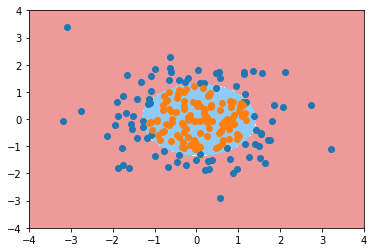

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

print(poly_log_reg.score(X, y))

plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

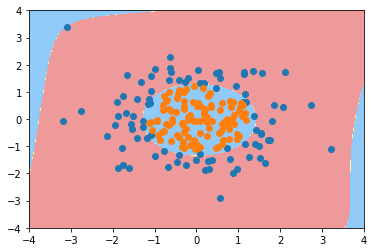

In [14]:
# 过拟合情况 degree = 20
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## sklean中使用逻辑回归

### 有噪点的数据

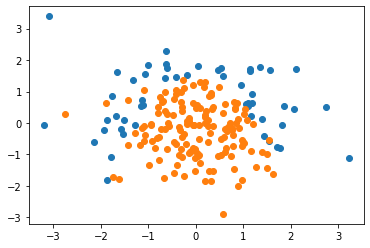

In [0]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1])<1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### sklean中的二分类逻辑回归

#### 线性逻辑回归

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.66
0.72


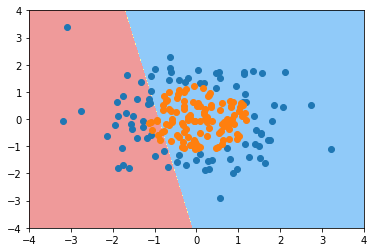

In [16]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 多项式逻辑回归(正则)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [18]:
print(poly_log_reg.score(X_train, y_train))
print(poly_log_reg.score(X_test, y_test))

0.9733333333333334
0.96


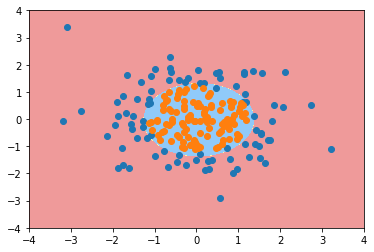

In [19]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [20]:
# 添加正则,C代表sigmod函数前的参数,越小正则越强,(sklearn不适用梯度下降求出来的)
def PolynomialLogisticRegression(degree,C,penalty='l2',solver="lbfgs"):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C,penalty=penalty,solver=solver))
    ])

poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1,penalty='l1',solver="liblinear")
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [21]:
print(poly_log_reg3.score(X_train, y_train))
print(poly_log_reg3.score(X_test, y_test))

0.9
0.92


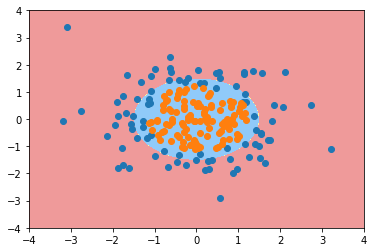

In [22]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### sklearn多分类逻辑回归

#### OvO 和 OvR

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423040410.jpg)
- OvR(One Vs Rest)
  - 对n种类别的样本分类，取一种样本作为一类，剩余看做另一类
  - 这样就形成了n个二分类问题
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423040430.jpg)
- OvO(One Vs One)
  - 对n种类别的样本分类，采取1对1的策略
  - $C_n^2$，其中n表示训练集中类别的数量
  - 速度慢,效果好
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423040439.png)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [24]:
# OVR
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9736842105263158

In [25]:
# OVO
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0

#### sklearn中的实现

In [26]:
# multi_class= 控制ovo和ovr
# 使用ovr
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

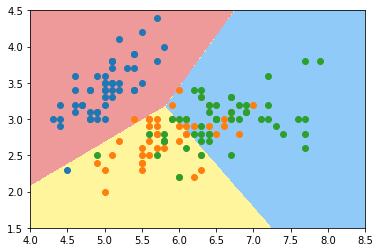

In [27]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

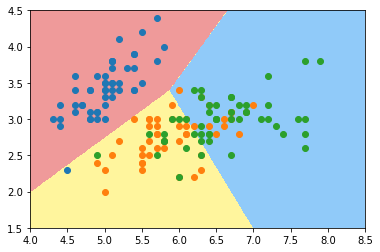

In [28]:
# 使用ovo
log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(X_train, y_train)
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E8%AF%84%E4%BB%B7%E5%88%86%E7%B1%BB%E7%BB%93%E6%9E%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 评价分类结果

- 回归: R-square
- 分类: 准确率 (skwed 数据存在问题)
  - 100人中有1个患病
  - 即使全部预测没有病,也有99%准确率
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032440.png)

## 混淆矩阵 (Confusion Matrix)

### 原理

- TP – True Positive：实际为男性，且判断为男性（正确）

- FN – False Negative：实际为男性，但判断为女性（错误）

- TN – True Negative：实际为女性，且判断为女性（正确）

- FP – False Positive：实际为女性，但判断为男性（错误)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032546.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032554.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032606.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423032852.png)

### 自我实现

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target == 9] = 1
y[digits.target != 9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
# 逻辑回归训练数据
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9822222222222222

In [2]:
y_log_predict = log_reg.predict(X_test)


def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))


def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))


def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))


def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))


def confusion_matrix(y_true, y_predict):
    return np.array([[TN(y_true, y_predict),
                      FP(y_true, y_predict)],
                     [FN(y_true, y_predict),
                      TP(y_true, y_predict)]])


confusion_matrix(y_test, y_log_predict)

array([[404,   1],
       [  7,  38]])

### sklearn混淆矩阵(二分类)

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[404,   1],
       [  7,  38]])

### sklearn混淆矩阵(多分类)

In [4]:
# 加载数据
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test_multi = train_test_split(X,
                                                          y,
                                                          test_size=0.8,
                                                          random_state=666)

standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test_multi)
y_predict_multi = log_reg.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_multi, y_predict_multi)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 127,   2,   0,   1,   0,   0,   0,   0,  13],
       [  0,   1, 133,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   3,   0,   2,   5,   0],
       [  0,   3,   0,   0, 142,   0,   0,   4,   0,   1],
       [  0,   1,   1,   1,   0, 146,   1,   0,   0,   2],
       [  1,   1,   0,   0,   0,   1, 133,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   7,   1,   2,   3,   1,   0,   2, 122,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]])

### 可视化混淆矩阵

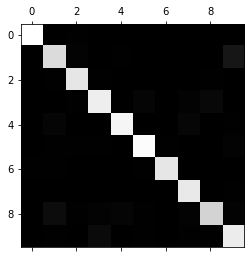

In [6]:
cfm = confusion_matrix(y_test_multi, y_predict_multi)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

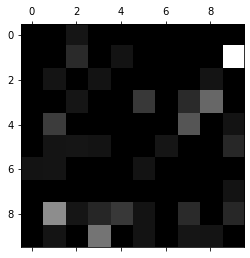

In [7]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)

plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()

## 精准率和召回率(Precision&Recall)

### 原理

- 精准率
$$Precision = \frac{{TP}}{{TP + FP}}$$
  - 例子解释,每做m次患病预测,成功率是多少
  - 可应用于股票,不保证预测出所有为1的值,但保证预测出来为1的数据尽肯能正确
- 召回率
$${\mathop{\rm Re}\nolimits} call = \frac{{TP}}{{TP + FN}}$$
  - 例子解释,真实为1的数据,我们成功预测出了多少
  - 可用于医疗,保证尽可能多的预测出为1的值,但不保证存在很多错误判断成1的值
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033227.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033237.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033245.png)

### 自我实现

In [8]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0


precision_score(y_test, y_log_predict)

0.9743589743589743

In [9]:
def recall_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0


recall_score(y_test, y_log_predict)

0.8444444444444444

### sklearn中的实现(二分类)

In [10]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9743589743589743

In [11]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8444444444444444

### sklearn中的实现(多分类)

In [12]:
from sklearn.metrics import precision_score

precision_score(y_test_multi, y_predict_multi, average="micro")

0.9464534075104312

In [13]:
from sklearn.metrics import recall_score

recall_score(y_test_multi, y_predict_multi,average="micro")

0.9464534075104312

## Precision-Recall 曲线

- 精确率（Precision）和召回率（Recall）之间的关系用图来表达
- 他们俩的关系是「两难全」的关系。
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423033813.png)

### sklearn中的调用

- 急速开始下降时,模型变坏


(150,)
(150,)
(149,)


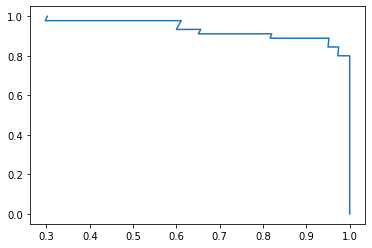

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# PR曲线
from sklearn.metrics import precision_recall_curve

decision_scores = log_reg.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(
    y_test, decision_scores)
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)
plt.plot(precisions, recalls)
plt.show()

## F1 score

- PR曲线之间找一个平衡点，就出现了一个 F1分数
- 精准率和召回率的调和平均值
- 调和平均可以惩罚极端情况。一个具有 1.0 的精度，而召回率为 0 的分类器，这两个指标的算术平均是 0.5，但是 F1 score 会是 0
- 调和平均值,如果有一项特别高或者特别低,最终值也会低
  - 原式
$$\frac{1}{{F1}} = \frac{1}{2}\left( {\frac{1}{{\Pr ecision}} + \frac{1}{{{\mathop{\rm Re}\nolimits} call}}} \right)$$
  - 化简
$$F1 = \frac{{2 \cdot \Pr ecision \cdot {\mathop{\rm Re}\nolimits} call}}{{\Pr ecision + {\mathop{\rm Re}\nolimits} call}}$$  

### 自我实现

In [19]:
import numpy as np

def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [20]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [21]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

### sklearn中的实现(二分类)

In [22]:
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.9047619047619048

### sklearn中的实现(多分类)

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test_multi, y_predict_multi,average="micro")

0.9464534075104312

## 阈值(Threshod)

- 原决策边界
$${\theta ^T} \cdot {x_b} = 0$$
- 加入 threshold 的决策边界
$${\theta ^T} \cdot {x_b} = Threshold$$  
- 加入threshold,可以主动调整决策边界,从而调整精准率和召回率
![1](https://tvax4.sinaimg.cn/large/a17dfad9gy1gdez0xrlntj20g506ijs5.jpg)

### threshold演示

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
# F1
f1_score(y_test, y_predict)

0.9047619047619048

In [25]:
# 代表sigmod后的值,也是最终判断指标
# 通过LogisticRegression下的decision_function获得
decision_scores = log_reg.decision_function(X_test)
decision_scores[:5]

array([ -9.24275126, -10.24462673,  -7.66462778, -29.19944838,
       -17.54760817])

In [26]:
print(np.min(decision_scores))
print(np.max(decision_scores))

-29.199448384400096
8.5075249340682


In [27]:
# threshold=5
y_predict_2 = np.array(decision_scores >= 5, dtype='int')
print(confusion_matrix(y_test, y_predict_2))
print(precision_score(y_test, y_predict_2))
print(recall_score(y_test, y_predict_2))

[[405   0]
 [ 37   8]]
1.0
0.17777777777777778


In [28]:
# threshold=-5
y_predict_2 = np.array(decision_scores >= -5, dtype='int')
print(confusion_matrix(y_test, y_predict_2))
print(precision_score(y_test, y_predict_2))
print(recall_score(y_test, y_predict_2))

[[348  57]
 [  1  44]]
0.43564356435643564
0.9777777777777777


### sklearn根据图选取theshold

(150,)
(150,)
(149,)


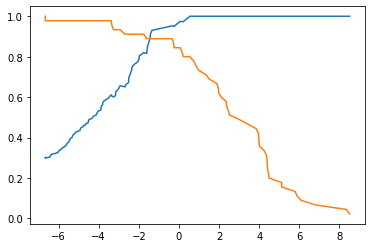

In [0]:
from sklearn.metrics import precision_recall_curve

decision_scores = log_reg.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

## ROC 曲线

### 原理

- **受试者工作特征曲线(receiver operating characteristic curve)**
- ROC 曲线也是通过遍历所有的值 来绘制整条曲线的
- TPR 越高，同时 FPR 越低（即 ROC 曲线越陡），那么模型的性能就越好
- 无论红蓝色样本比例如何改变，ROC 曲线都没有影响
- 公式
  $$TRP = \frac{{TP}}{{TP + FN}}$$
  $$FRP = \frac{{FP}}{{FP + TN}}$$  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423034108.gif)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423034156.gif)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423034206.gif)

### AUC

- 为了计算 ROC 曲线上的点，我们可以使用不同的分类阈值多次评估逻辑回归模型，但这样做效率非常低
- 有一种基于排序的高效算法可以为我们提供此类信息，这种算法称为曲线下面积（Area Under Curve）。
- 如果我们连接对角线，它的面积正好是 0.5。对角线的实际含义是：随机判断响应与不响应，正负样本覆盖率应该都是 50%，表示随机效果。 AUC = 0.5，跟随机猜测一样（例：丢铜板），模型没有预测价值。
- ROC 曲线越陡越好，所以理想值就是 1
- AUC 的一般判断标准
    - 0.5 – 0.7： 效果较低，但用于预测股票已经很不错了
    - 0.7 – 0.85： 效果一般
    - 0.85 – 0.95： 效果很好
    - 0.95 – 1： 效果非常好，但一般不太可能

### sklearn中实现ROC

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#加载数据
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0
# 数据归一化
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
standerscaler = StandardScaler()
standerscaler.fit(X_train)
X_train = standerscaler.transform(X_train)
X_test = standerscaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

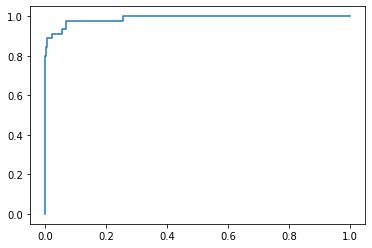

In [30]:
from sklearn.metrics import roc_curve

decision_scores = log_reg.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

plt.plot(fprs, tprs)
plt.show()

### sklearn中实现AUC

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.989190672153635

## sklearn中实现AUC(多分类)

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E6%94%AF%E6%92%91%E5%90%91%E9%87%8F%E6%9C%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 支撑向量机(Support Vector Machine)

## 原理

### 归纳解释

- 既可以解决**回归**, 又可以解决**分类**
- SVM**本身具有泛化能力**, 不依靠正则化和预处理
- 需要进行归一化处理
  
  
- **Hard Margin SVM(清晰地边界)**
  - SVM尝试寻找一个最优的决策边界,距离两个类别的最近的样本最远
  - SVM的目的最大化margin
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413132734.PNG)  
    

- **Soft Margin SVM(不清晰的边界)**
  - 决策边界线性不可分
  - 拥有一定容错能力
  - C越大越趋近hard margin SVM
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413144505.PNG)

- 回归问题
  - 在margin里面容纳尽可能多的点
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413172503.PNG)

### 公式推导(Hard Margin)

- 解析几何, 点到直线的距离
  - (X,Y)到Ax+By+C=0的距离
    - $\frac{|A x+B y+C|}{\sqrt{A^{2}+B^{2}}}$
  - 拓展到n维空间
    - $\begin{array}{l}
{\theta ^T}{x_b} = 0\\
{w^T}x + b = 0\\
\frac{{\left| {{w^T}x + b} \right|}}{{\left\| w \right\|}} = 0\\
\left\| w \right\| = \sqrt {w_1^2 + w_2^2 +  \cdots  + w_n^2} 
\end{array}$ 
- 所有的点到决策边界的距离>=d, $\forall$表示任意一个
  - $\left\{\begin{aligned}
\frac{w^{T} x^{(i)}+b}{\|w\|} \geq d & & \forall y^{(i)}=1 \\
\frac{w^{T} x^{(i)}+b}{\|w\|} \leq-d & & \forall y^{(i)}=-1
\end{aligned}\right.$
 
- 两边除以d  
  - $\left\{\begin{aligned}
\frac{w^{T} x^{(i)}+b}{\|w\| d} \geq 1 & & \forall y^{(i)}=1 \\
\frac{w^{T} x^{(i)}+b}{\|w\| d} \leq-1 & & \forall y^{(i)}=-1
\end{aligned}\right.$ 
- $\left\|w\right\|d$是一个数,同时除一个数,进行变形  
  - $\left\{\begin{array}{cl}
w_{d}^{T} x^{(i)}+b_{d} \geq 1 & \forall y^{(i)}=1 \\
w_{d}^{T} x^{(i)}+b_{d} \leq-1 & \forall y^{(i)}=-1
\end{array}\right.$  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413135753.PNG)  
- 因为等号右边是0,同时除以一个常数不变  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413135757.PNG)
- 简化符号去掉角标,代表意义于最初不同  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413140515.PNG)  
- 融合成一个式子  
  - $y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1$ 
- 最小化的目标  
  - $\begin{array}{l}
\max \frac{{\left| {{w^T}x + b} \right|}}{{w}}\\
\max \frac{1}{{w}}\\
\min w
\end{array}$  
- 求导求极值(有条件求导,需要用拉普拉斯算子)  
  - $\min \frac{1}{2}\|w\|^{2}$
  - $st.\quad y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1$










### 公式推导(Soft Margin)

- 要使求导后的最小化函数有一定容错能力
- 采用类似正则的法式, 将决策边界允许平移一段距离$\zeta$
  - $\min \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{m} \zeta_{i}$
  - $st. y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1-\zeta_{i}$
  - $\zeta_{i} \geq 0$  
- 比较L1正则, L2正则
  - L1正则
    - $\min \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{m} \zeta_{i}$
    - $st . \quad y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1-\zeta_{i}$
    - $\zeta_{i} \geq 0$
  - L2正则
    - $\min \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{m} \zeta_{i}^{2}$
    - $st . \quad y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1-\zeta_{i}$
    - $\zeta_{i} \geq 0$


## 核函数

- **将原输入数据变形,以满足需求**
- 数学上的问题转换  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413153230.PNG)  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413153234.PNG)

### 多项式核函数

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413153350.PNG)

### 高斯核函数

- 也称为RBF(镜像奇函数)
- 高斯核函数是将每个样本点映射到一个无穷维的特征空间  
- 高斯函数 
$$g(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}$$  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413170659.PNG)  
- 高斯核函数  
$$K(x, y)=e^{-\left.\gamma|| x - y\right||^{2}}$$ 
- gamma越大高斯分布越窄
- gamma越小高斯分布越宽


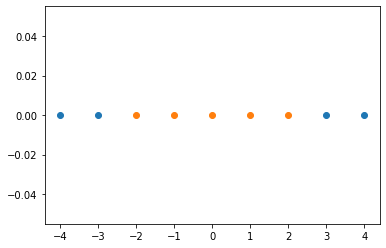

In [0]:
# 将一维数据映射到两维
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 5, 1)
y = np.array((x >= -2) & (x <= 2), dtype='int')
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

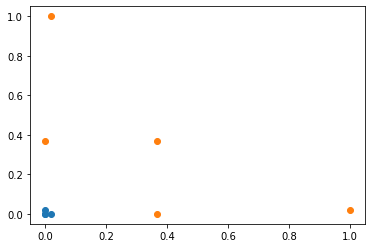

In [0]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)
l1, l2 = -1, 1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

## Sklearn二分类

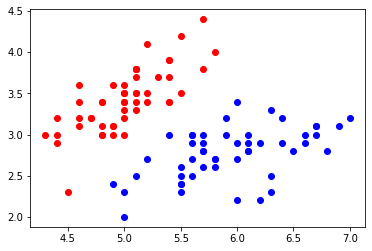

In [1]:
# 只进行fit过程
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
# 标准化
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
# 调用svm
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

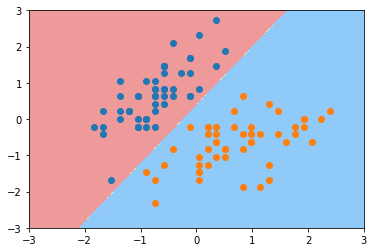

In [6]:
# C的约束为C=1e9,容错率较小
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [7]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

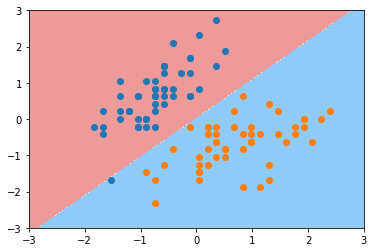

In [8]:
# C的约束为C=0.01,容错率高
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

## Sklearn多分类

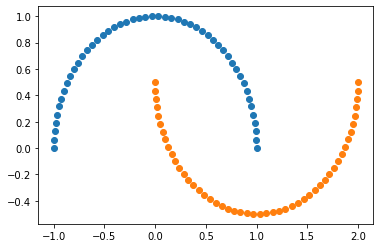

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# 生成moon样子的数据
X, y = datasets.make_moons()
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

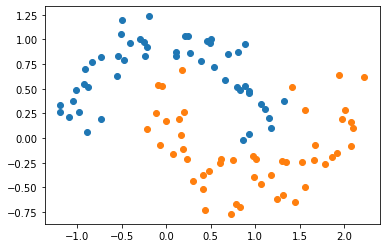

In [10]:
# 加噪音
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def PolynomialKernelSVC(degree, C):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))
    ])

poly_kernel_svc = PolynomialKernelSVC(degree=3, C=0.0001)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=0.0001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

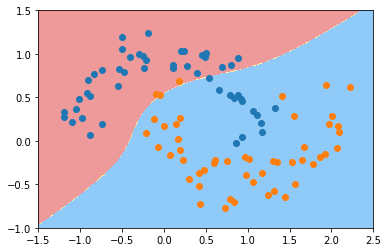

In [12]:
# 容错率高
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

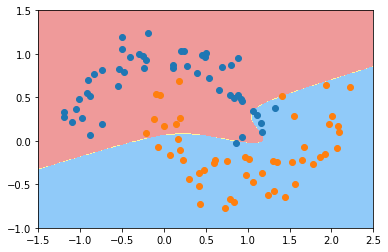

In [13]:
# 容错率低
poly_kernel_svc = PolynomialKernelSVC(degree=3, C=1000)
poly_kernel_svc.fit(X, y)
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Sklearn高斯核函数

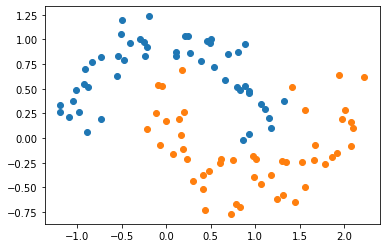

In [14]:
## 高斯核函数
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def RBFKernelSVC(gamma):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

svc = RBFKernelSVC(gamma=1)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

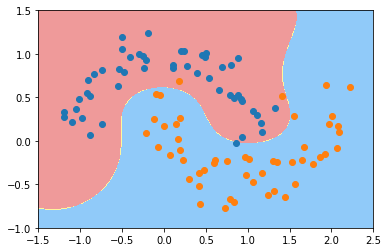

In [16]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [17]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=100, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

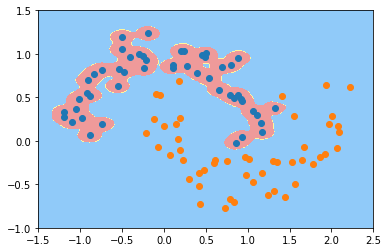

In [18]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [19]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

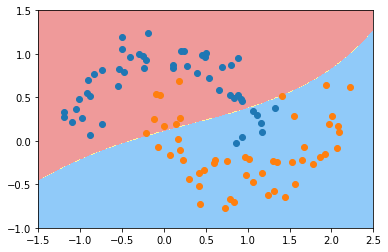

In [20]:
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Sklearn回归问题

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [22]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

In [23]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVR',
                 LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [24]:
svr.score(X_test, y_test)

0.6354924961657551

In [25]:
# 修改参数提升准确率
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', SVR(kernel="rbf",epsilon=epsilon,C=50))
    ])

In [26]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVR',
                 SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [27]:
svr.score(X_test, y_test)

0.8251665336701568

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E5%86%B3%E7%AD%96%E6%A0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 决策树(Decision tree)

## 原理

### 图解

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423044551.png)  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423045912.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423045926.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423045934.png)

### 特性与局限

- 非参数学习算法
- 可以解决分类问题(包括多分类)
  - 回归问题利用取平均值
- 也可以解决回归问题
- 拥有很好的可解释性
  
> 如何确定哪个维度和哪个值, 依靠最小化**信息熵** or **基尼系数**  
> 当全预测对了, 信息熵便小了, 预测错误越多信息熵越大
> 本质二者没有什么区别, 信息熵更慢(因为求log)  
> 通过搜索边界值,使系统针对每一个分类都很确定  
> sklearn采用了CART,对某一维度某一阈值进行二分  
  
> 只能生成矩形的决策边界
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200417152717.png)

> 对个别数据敏感,改一个数据,决策边界就不一样了

### 信息熵(Entropy)

- 随机变量的不确定性的度量
- 信息熵越大, 数据的不确定性越高
  - 越热, 越活动
- 信息熵越小, 数据的不确定性越低
  - 越冷,越静止

- 公式  
  - $$ H=-\sum_{i=1}^{k} p_{i} \log \left(p_{i}\right) $$ 
  - K个样本, 每个概率Pi, Pi<1, Log(Pi)<0, 整体大于0
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200417110547.png) 

  - 二分类公式,合并成一个
  - $$ H=-x \log (x)-(1-x) \log (1-x) $$
  - x是一类的概率



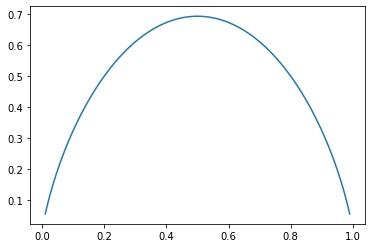

In [0]:
# 在x的概率是不可能, he100%时信息熵最大,等概率是最不确定的时候
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)
x = np.linspace(0.01, 0.99, 200)
plt.plot(x, entropy(x))
plt.show()

### 基尼系数(Gini Index)

- 公式(sklearn默认基尼系数)
  - $$ G=1-\sum_{i=1}^{k} p_{i}^{2} $$ 
  - $$
\begin{aligned}
G &=1-x^{2}-(1-x)^{2} \\
&=1-x^{2}-1+2 x-x^{2} \\
&=-2 x^{2}+2 x
\end{aligned}
$$
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200417142917.png)
  


## Sklearn信息熵

### 自我实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                
    return best_entropy, best_d, best_v

best_entropy, best_d, best_v = try_split(X, y)
print("best_entropy =", best_entropy)
print("best_d =", best_d)
print("best_v =", best_v)

best_entropy = 0.46209812037329684
best_d = 0
best_v = 2.45


### sklearn 实现

In [2]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

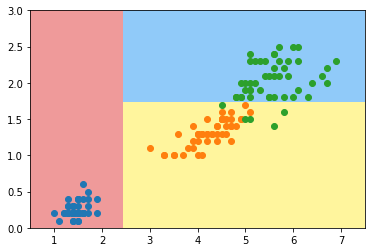

In [4]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## Sklearn基尼系数

### 自我实现

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

def try_split(X, y):
    
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                g = p_l * gini(y_l) + p_r * gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
                
    return best_g, best_d, best_v

best_g, best_d, best_v = try_split(X, y)
print("best_g =", best_g)
print("best_d =", best_d)
print("best_v =", best_v)

best_g = 0.3333333333333333
best_d = 0
best_v = 2.45


### Sklearn实现

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
dt_clf.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

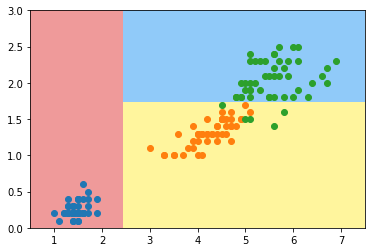

In [8]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## CART 和 超参数

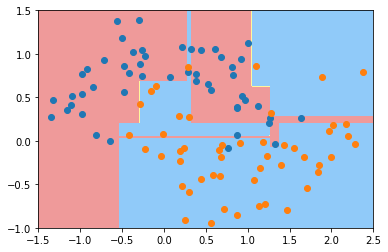

In [9]:
# Hyperparameters
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()


### max_depth

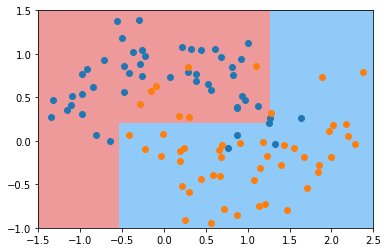

In [10]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### min_samples_split

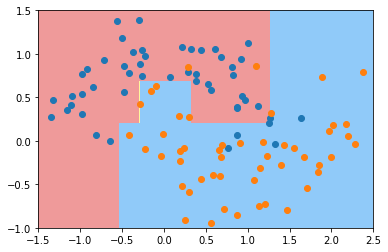

In [11]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### min_samples_leaf

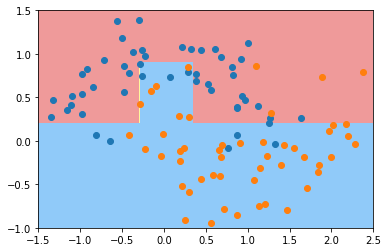

In [12]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

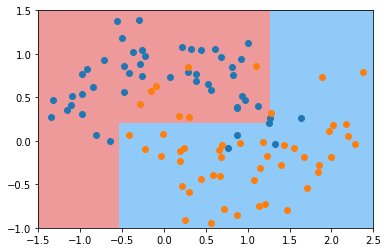

In [13]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Sklearn决策树解决回归问题

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [17]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [18]:
dt_reg.score(X_test, y_test)

0.5808623799848871

In [19]:
# 过拟合, 训练100%
dt_reg.score(X_train, y_train)

1.0

### 基于r方绘制学习曲线

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


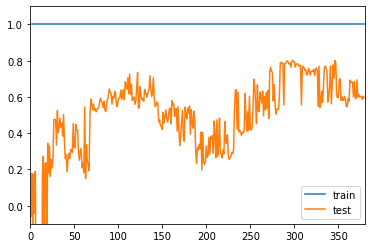

In [20]:
from sklearn.metrics import r2_score

def plot_learning_curve_r2(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(r2_score(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(r2_score(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               train_score, label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               test_score, label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, -0.1, 1.1])
    plt.show()
    
plot_learning_curve_r2(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


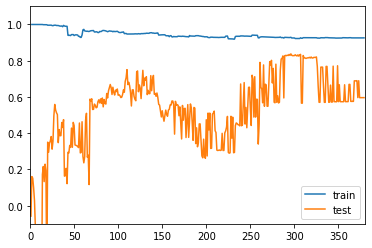

In [21]:

plot_learning_curve_r2(DecisionTreeRegressor(max_depth=5), X_train, X_test, y_train, y_test)

### 模型复杂度曲线

课程代码文件夹

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E6%95%B0%E6%8D%AE%E5%BD%92%E4%B8%80%E5%8C%96%E9%9B%86%E6%88%90%E5%AD%A6%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 集成学习(Ensemble Learning)

- 实现多种机器学习算法
- 运行多种算法进行投票
- 随机森林是一种集成学习

## 自我实现

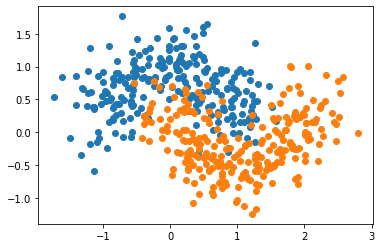

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 算法1
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)

# 算法2
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

# 算法3
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=666)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

# 集合算法1,算法2, 算法3
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

accuracy_score(y_test, y_predict)

0.904

## sklearn实现


### Hard voting

- 少数服从多数,有时候有问题  
- 例如少数人的暴政
- 没有考虑"专家"的意见(可能有些算法100%确定,有些只有51%确定)
- ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200417201245.png)

In [3]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC()),
    ('dt_clf', DecisionTreeClassifier(random_state=666))],
                             voting='hard')

voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.904

### Soft voting

- 有些模型的权值应该更大
- 就像歌唱比赛的专家票  
- 把每个模型的估计概率算进去,必须获得概率
- ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200417201410.png)

- 逻辑回归支持概率
- KNN支持估计概率
- 决策树支持估计概率
- SVM支持估计概率(复杂)

In [4]:
# svm probability=True
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf', LogisticRegression()), 
    ('svm_clf', SVC(probability=True)),
    ('dt_clf', DecisionTreeClassifier())],
                             voting='soft')

voting_clf2.fit(X_train, y_train)
voting_clf2.score(X_test, y_test)

0.904

## Bagging和Boosting

- 样例权重：
    - Bagging：使用均匀取样，每个样例的权重相等
    - Boosting：根据错误率不断调整样例的权值，错误率越大则权重越大。

- 预测函数：
    - Bagging：所有预测函数的权重相等。
    - Boosting：每个弱分类器都有相应的权重，对于分类误差小的分类器会有更大的权重。

- 并行计算：
    - Bagging：各个预测函数可以并行生成
    - Boosting：各个预测函数只能顺序生成，因为后一个模型参数需要前一轮模型的结果。

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423043002.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423043011.png)

### Bagging

#### 原理

- 也称作“套袋法”
- 创建更多的子模型,集成更多子模型意见
- 子模型之间不能一致, 子模型之间要有**差异性**
- 每个子模型模型只看样本数据的一部分
  - 一共有500个样本数据;每个子模型只看100个样本数据
  - 每个子模型不需要太高准确率
     - 如果每个子模型只有51%准确率
     - 如果我们只有1个子模型, 整体准确率51%
     - 如果有3个子模型, 整体${\rm{0}}{\rm{.5}}{{\rm{1}}^{\rm{3}}}{\rm{ + C}}_{\rm{3}}^{\rm{2}} \cdot {\rm{0}}{\rm{.5}}{{\rm{1}}^{\rm{2}}} \cdot {\rm{0}}{\rm{.49 = 51}}{\rm{.5\% }}$ (3个说对+两个说对)
     - 如果有500个模型,整体$\sum\limits_{{\rm{i = 251}}}^{{\rm{500}}} {{\rm{C}}_{{\rm{500}}}^{\rm{i}}}  \cdot {\rm{0}}{\rm{.5}}{{\rm{1}}^{\rm{i}}} \cdot {\rm{0}}{\rm{.4}}{{\rm{9}}^{{\rm{500 - i}}}}{\rm{ = 65}}{\rm{.6}}$ (251说对+252说对+...+500说对)
     - 如果每个模型准确率是60%, 500个模型的准确率99.99%  
  


#### Bagging和Pasting

- 放回取样 (bagging)
  - Bootsrap 统计学叫法
  - 更常用
  - 不强烈依赖于随机
- 不放回取样 (pasting)
  - 依赖随机, 怎么分子模型很重要

#### sklearn实现Bagging(bootstrap)

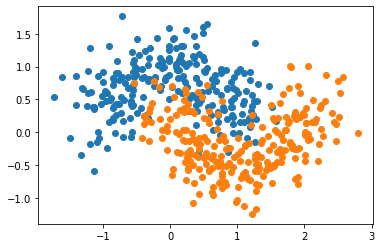

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# 500个子模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.92

In [8]:
# 5000个子模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.912

#### 超参数

##### OOB(Out of Bag)

- 放回取样导致一部分样本可能没有取到
- 平均大约有37%的样本没有渠道
- 不需要使用train_test_split, 而使用这部分没有取到的样本做测试/验证
- oob_score_来衡量模型

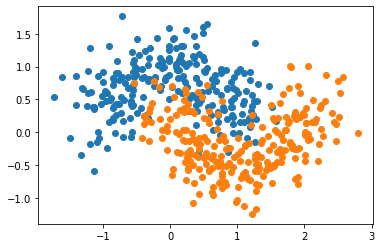

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# 不进行train_test_split
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [18]:
bagging_clf.oob_score_

0.918

##### n_jobs(多核)

In [19]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

CPU times: user 729 ms, sys: 10.4 ms, total: 739 ms
Wall time: 741 ms


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [20]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               n_jobs=-1)
bagging_clf.fit(X, y)

CPU times: user 231 ms, sys: 7.46 ms, total: 238 ms
Wall time: 620 ms


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


##### bootstrap_features

- 对特征进行随机取样
  - x的维度高(例如图像识别)
  - random subspaces
- 即针对样本, 又针对特征进行随机采样
  - random patches

In [21]:
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=500,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.828

In [22]:
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.858

### Boosting的方式

- 集成多个模型
- 每个模型都在尝试增强(boosting)整体的效果
- 没有out of bag  
  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423043002.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423043011.png)

#### Ada Boosting

- 将多个弱分类器（弱分类器一般选用单层决策树）进行合理的结合，使其成为一个强分类器
- 整合原理进行权重的调整
- 上一次拟合不好的数据提高权重
- 每个子模型试图弥补上一个子模型错误
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200418004941.PNG)  
  
- AdaBoost算法优点：
    - 很好的利用了弱分类器进行级联；
    - 可以将不同的分类算法作为弱分类器；
    - AdaBoost具有很高的精度；
    - 相对于bagging算法和Random Forest算法，AdaBoost充分考虑的每个分类器的权重；
- Adaboost算法缺点：
    - AdaBoost迭代次数也就是弱分类器数目不太好设定，可以使用交叉验证来进行确定；
    - 数据不平衡导致分类精度下降；
    - 训练比较耗时，每次重新选择当前分类器最好切分点；

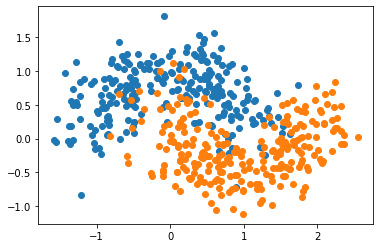

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [4]:
ada_clf.score(X_test, y_test)

0.864

#### Gradient Boosting

- 训练一个模型m1, 产生错误e1
- 针对e1训练第二个模型m2,产生错误e2
- 针对e2训练第三个模型m3, 产生错误e3
- 最终预测结果 m1+m2+m3+.....
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200418005504.PNG)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=30,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
gb_clf.score(X_test, y_test)

0.904

#### boosting解决回归问题

In [0]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### 集成学习解决回归问题

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

<a href="https://colab.research.google.com/github/LinCheungS/ml_sklearn_tutorial/blob/master/%E9%9A%8F%E6%9C%BA%E6%A3%AE%E6%9E%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 随机森林(Random forest)

## 原理

- 是一种集成学习的方法
- 通过在一个数据集上运行多个并行算法, 提升准确率
- sklearn中随机森林底层是决策树
  
- 优点
    - 它可以出来很高维度（特征很多）的数据，并且不用降维，无需做特征选择
    - 它可以判断特征的重要程度
    - 可以判断出不同特征之间的相互影响
    - 不容易过拟合
    - 训练速度比较快，容易做成并行方法
    - 对于不平衡的数据集来说，它可以平衡误差。
    - 如果有很大一部分的特征遗失，仍可以维持准确度。
- 缺点
    - 随机森林已经被证明在某些噪音较大的分类或回归问题上会过拟合。
    - 对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的  
  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423050323.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423050332.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423050338.png)
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020-1/20200423050345.png)

## sklearn实现随机森林

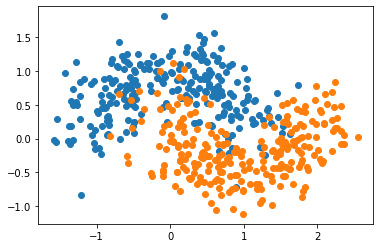

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=666, n_jobs=-1)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [3]:
rf_clf.oob_score_

0.892

In [4]:
rf_clf2 = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, oob_score=True, random_state=666, n_jobs=-1)
rf_clf2.fit(X, y)
rf_clf2.oob_score_

0.906

## Extra Trees

- Bagging
- Base Estimator:Decision Tree
- 决策树在节点划分上, 使用随机的特征和随机的阈值
- 更加的随机
- 提供额外的随机性, 抑制过拟合,但增大了bias
- 更快地训练速度

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=666, n_jobs=-1)
et_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                     oob_score=True, random_state=666, verbose=0,
                     warm_start=False)

In [6]:
et_clf.oob_score_

0.892

## 集成学习解决回归问题

In [0]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor